Here we perform PCA regression on the data matrix assembled and saved in the  "saved_data" folder

In the later part of the code, PCA is performed on moving windows over the entire range of the data

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
import allantools


In [2]:
#import data matrix
#fpath = '../saved_data/week3_fourth_cycle/demeaned_data_matrix_fourth_cycle_week_3'
fpath = '../saved_data/week1_cycle1/demeaned_data_matrix_first_cycle_week1'

df = pd.read_csv(fpath, sep=',', header=0)

In [3]:
# slice the df into X and y
col_list = df.columns

X = df[col_list[1:]]
y = df[col_list[0]]; y = y+273.15

<AxesSubplot:>

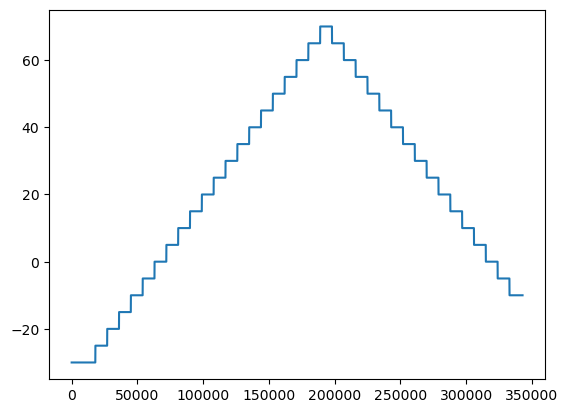

In [4]:
df[col_list[0]].plot()

In [5]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_train = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
X_reduced_train = pca_train.fit_transform(X_train) 


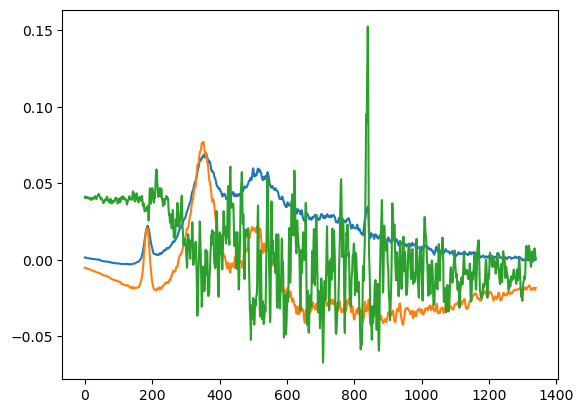

In [7]:
plt.plot(pca_train.components_[:3].T);

In [8]:
#loadings_train = (X_train@pca_train.components_.T)

In [9]:
#plt.plot(loadings_train[0].values);

In [10]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
#X_reduced_train = pca.fit_transform(X_train) 
X_reduced = pca.fit_transform(X) 

In [11]:
'''# Create scree plot
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

export_name = '../saved_data/sensor_2_week_1_first_cycle_screeplot.png'

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
#plt.savefig(export_name, dpi=700)
plt.show()'''

"# Create scree plot\n# Get explained variance ratio\nexplained_variance_ratio = pca.explained_variance_ratio_\n\nexport_name = '../saved_data/sensor_2_week_1_first_cycle_screeplot.png'\n\nplt.figure(figsize=(10, 6))\nplt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')\nplt.title('Scree Plot')\nplt.xlabel('Principal Component')\nplt.ylabel('Variance Explained')\nplt.xticks(range(1, len(explained_variance_ratio) + 1))\nplt.grid()\n#plt.savefig(export_name, dpi=700)\nplt.show()"

In [12]:
#loadings = (X@pca.components_.T)

In [13]:
#### create a moving average PCA with time window growing with each iteration 
#### at each step save the modes and their loadings to  file


#components_gw = []
#loadings_gw = []
w_size = []
training_error, testing_error = [], []
lr = LinearRegression()

def growing_window_pca_regression(data, y , window_size=10000):
    pca_d = PCA(n_components=10)
    print('test')
    for start in range(0, data.shape[0] - window_size + 1, window_size):
        print(start)
        window = data.iloc[0:start + window_size, :]
        w_size.append(start+window_size)
        y_tr =  y.iloc[0:start + window_size]
        y_tt =  y.iloc[start + window_size:]
        pca_d.fit(window)
        loadings = (X@pca_d.components_.T); 
        lr.fit(window, y_tr)
        y_pred_training = lr.predict(window)
        y_pred_testing = lr.predict(data.iloc[start + window_size:, :])
        training_err = np.round(np.sqrt(mean_squared_error(y_tr, y_pred_training)), 3)
        testing_err = np.round(np.sqrt(mean_squared_error(y_tt, y_pred_testing)), 3)
        training_error.append(training_err)
        testing_error.append(testing_err)
        print('training error is {} and the testing error is {}'.format(training_err, testing_err))
  
        

In [14]:
growing_window_pca_regression(X, y , window_size=10000)

test
0
training error is 0.0 and the testing error is 60.0
10000
training error is 0.207 and the testing error is 17.03
20000
training error is 0.217 and the testing error is 13.361
30000
training error is 0.22 and the testing error is 11.715
40000
training error is 0.223 and the testing error is 10.677
50000
training error is 0.225 and the testing error is 11.323
60000
training error is 0.249 and the testing error is 9.782
70000
training error is 0.261 and the testing error is 7.65
80000
training error is 0.287 and the testing error is 5.317
90000
training error is 0.296 and the testing error is 5.109
100000
training error is 0.303 and the testing error is 6.143
110000
training error is 0.319 and the testing error is 5.482
120000
training error is 0.343 and the testing error is 3.925
130000
training error is 0.347 and the testing error is 3.538
140000
training error is 0.376 and the testing error is 2.214
150000
training error is 0.408 and the testing error is 2.572
160000
training er

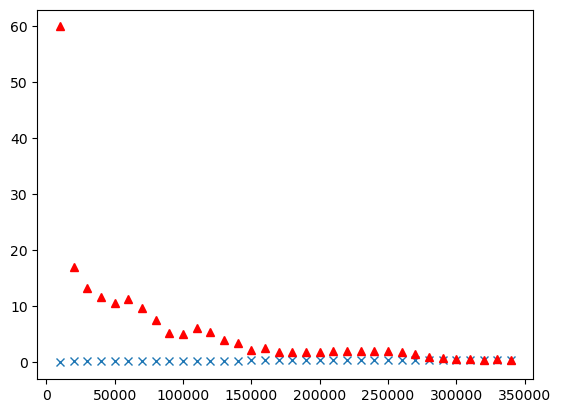

In [15]:
df_gw = pd.DataFrame(list(zip(w_size, training_error, testing_error)))
df_gw.columns = ['w_size', 'training_error', 'testing_error']

plt.plot(df_gw.w_size.values, df_gw.training_error.values, 'x')
plt.plot(df_gw.w_size.values, df_gw.testing_error.values, 'r^')

In [16]:
#### create a moving average PCA with time window growing with each iteration 
#### at each step save the modes and their loadings to  file


components_gw = []
loadings_gw = []
w_size = []

def growing_window_pca(data, window_size=10000):
    pca_d = PCA(n_components=10)
    print('test')
    for start in range(0, data.shape[0] - window_size + 1, window_size):
        print(start)
        window = data.iloc[0:start + window_size, :]
        w_size.append(start+window_size)
        #plt.plot(y.iloc[0:start + window_size]); plt.show()
        pca_d.fit(window)
        components_gw.append(pca_d.components_)
        loadings = (X@pca_d.components_.T);  
        loadings_gw.append(loadings)
        


In [17]:
growing_window_pca(X, window_size=10000)  #10000

test
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000


In [18]:
w_size[17]
#components_gw[6]

180000

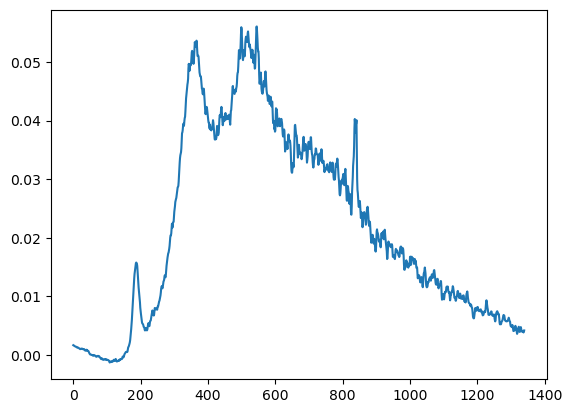

In [19]:
plt.plot(components_gw[17][0])

In [20]:
time_step = 17
mode_0 = np.array(components_gw[time_step][0]).reshape(1, -1)*np.array(loadings_gw[time_step][0]).reshape(-1, 1)
mode_1 = np.array(components_gw[time_step][1]).reshape(1, -1)*np.array(loadings_gw[time_step][1]).reshape(-1, 1)
mode_2 = np.array(components_gw[time_step][2]).reshape(1, -1)*np.array(loadings_gw[time_step][2]).reshape(-1, 1)

mode_3 = np.array(components_gw[time_step][3]).reshape(1, -1)*np.array(loadings_gw[time_step][3]).reshape(-1, 1)
mode_4 = np.array(components_gw[time_step][4]).reshape(1, -1)*np.array(loadings_gw[time_step][4]).reshape(-1, 1)
mode_5 = np.array(components_gw[time_step][5]).reshape(1, -1)*np.array(loadings_gw[time_step][5]).reshape(-1, 1)

mode_6 = np.array(components_gw[time_step][6]).reshape(1, -1)*np.array(loadings_gw[time_step][6]).reshape(-1, 1)
mode_7 = np.array(components_gw[time_step][7]).reshape(1, -1)*np.array(loadings_gw[time_step][7]).reshape(-1, 1)
mode_8 = np.array(components_gw[time_step][8]).reshape(1, -1)*np.array(loadings_gw[time_step][8]).reshape(-1, 1)
mode_9 = np.array(components_gw[time_step][9]).reshape(1, -1)*np.array(loadings_gw[time_step][9]).reshape(-1, 1)

In [21]:
B = X - mode_0 - mode_1 - mode_2  
C = X - mode_0 - mode_1 - mode_2  - mode_3 - mode_4 - mode_5 #- mode_6- mode_7 - mode_8 - mode_6
D = X - mode_0 - mode_1 - mode_2  - mode_3 - mode_4 - mode_5 - mode_6- mode_7 - mode_8# - mode_9


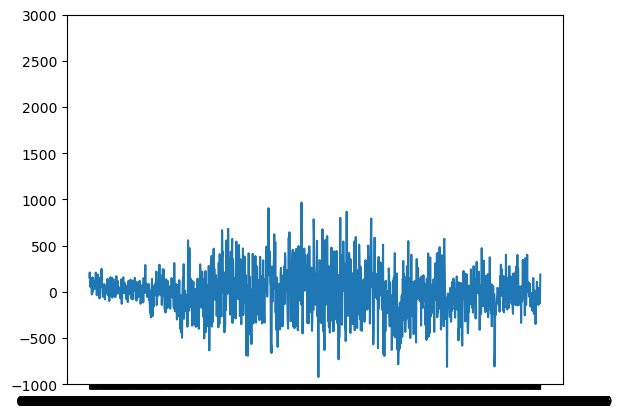

In [22]:
plt.plot(B.iloc[0, :]); plt.ylim(-1000, 3000);plt.show()

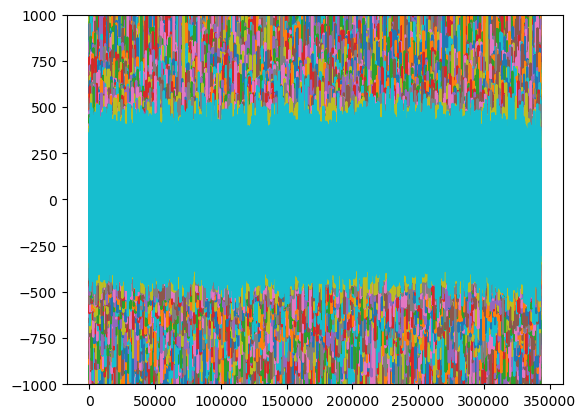

In [23]:
plt.plot(C.iloc[0:,]); plt.ylim(-1000, 1000); plt.show()


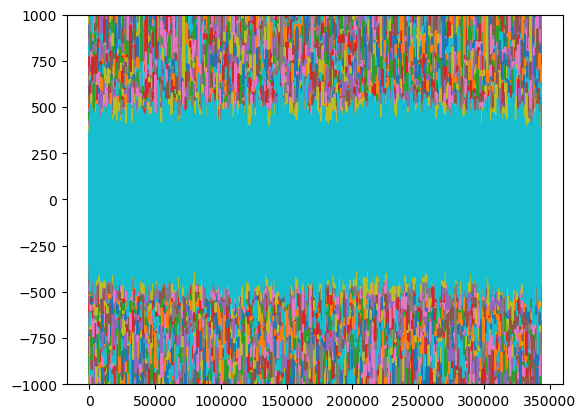

In [24]:
plt.plot(D.iloc[0:,]); plt.ylim(-1000, 1000); 

In [25]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_ = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
#X_reduced_train = pca.fit_transform(X_train) 
pca_.fit_transform(B) 

array([[-1.55033506e+02,  6.31808398e+02,  3.29332452e+03, ...,
         5.69990700e+02,  1.63237108e+01,  6.24287291e+01],
       [-7.22788427e+02,  9.88936588e+02,  2.54655029e+03, ...,
         1.38025896e+03, -1.71925480e+02,  3.12265799e+02],
       [-4.27282291e+02,  1.12892079e+03,  1.84220242e+03, ...,
         1.95788640e+02, -2.09053370e+02, -8.20074521e+01],
       ...,
       [ 3.34167086e+03, -5.10841027e+03, -2.16819787e+03, ...,
         3.30711644e+02, -4.29603711e+02,  1.95030069e+02],
       [ 3.80099520e+03, -4.43692818e+03, -1.36424041e+03, ...,
         1.35765586e+02, -3.17270818e+00, -4.10289977e+02],
       [ 3.93568729e+03, -4.27986072e+03, -1.24686333e+03, ...,
         3.21209556e+02, -2.13080059e+02, -1.11621158e+02]])

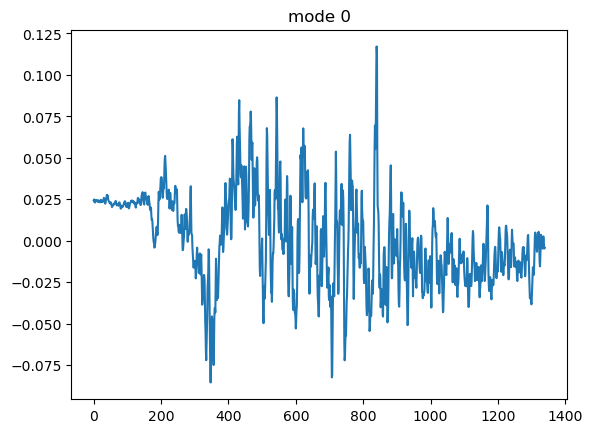

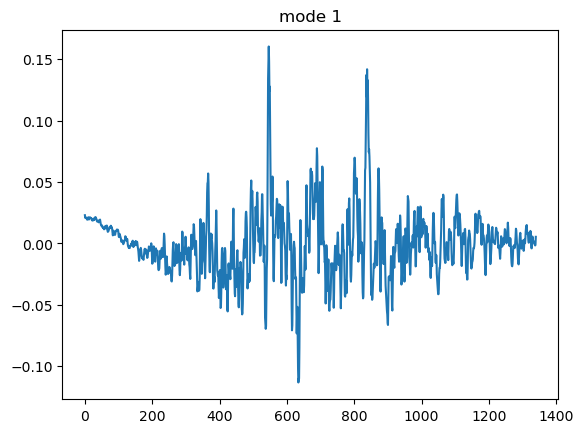

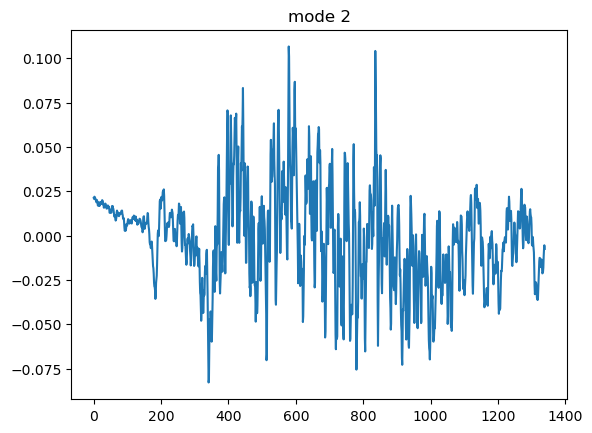

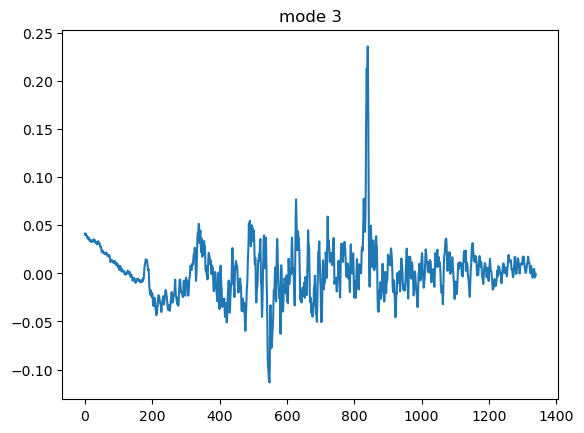

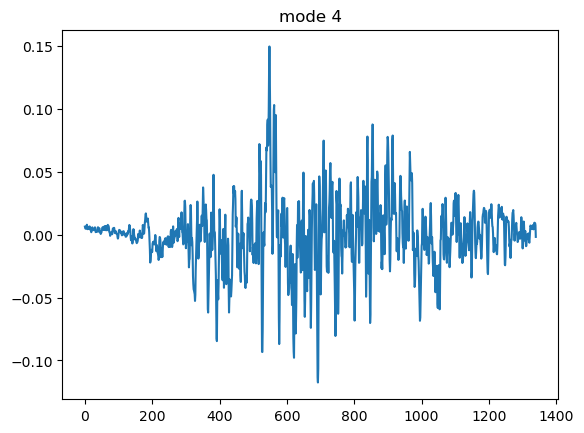

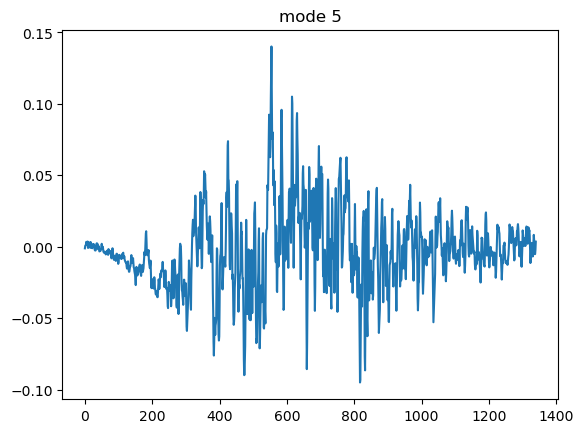

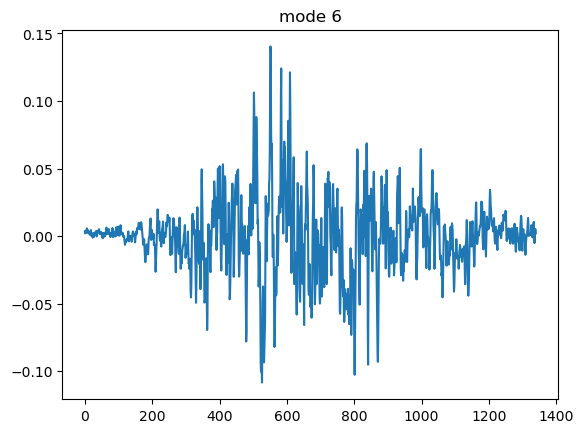

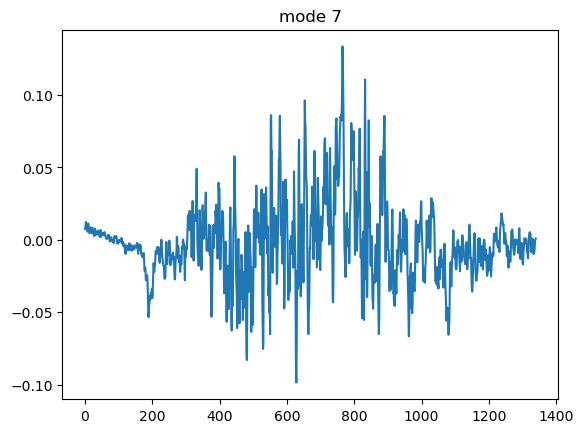

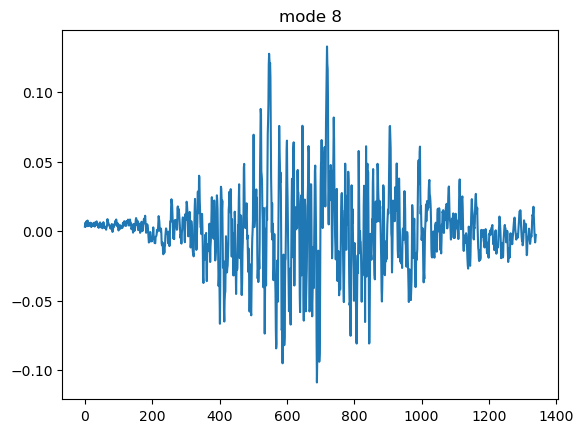

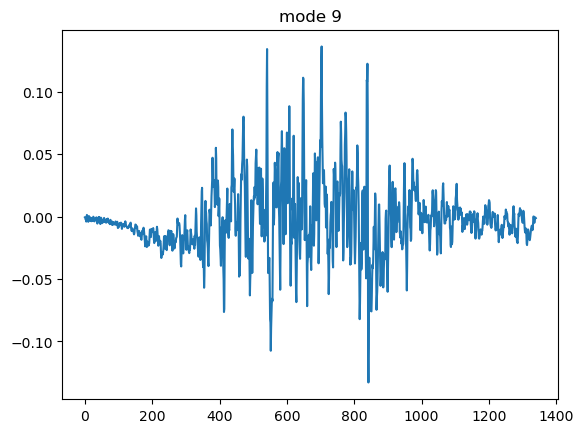

In [26]:
for i in range(n_comps):
    plt.plot(pca_.components_[i,:].T);
    plt.title('mode {}'.format(i))
    plt.show()

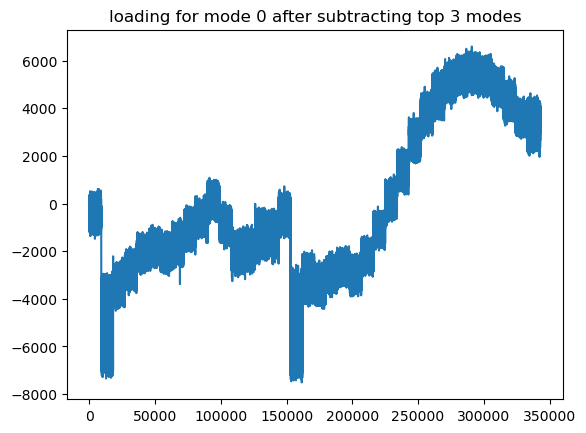

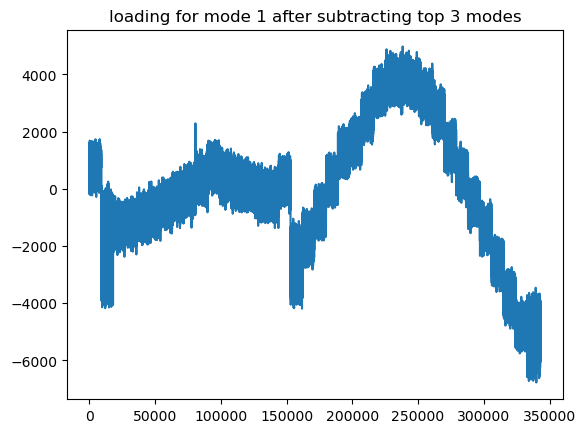

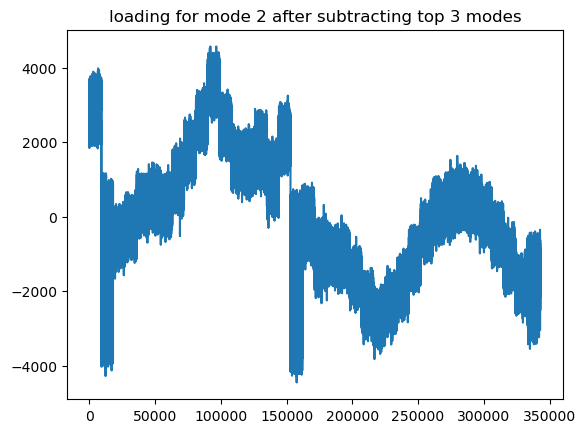

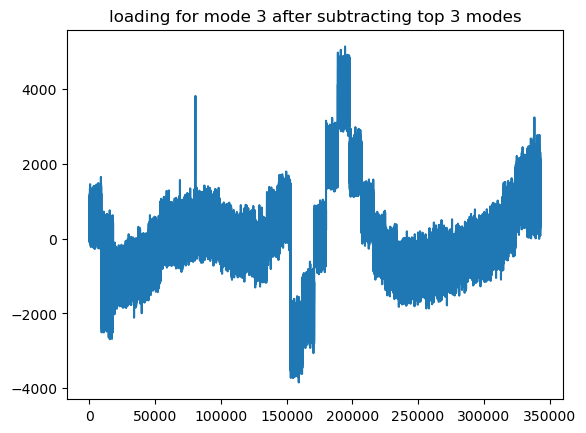

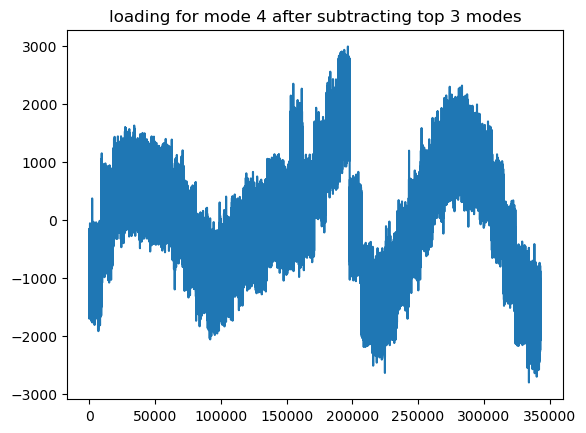

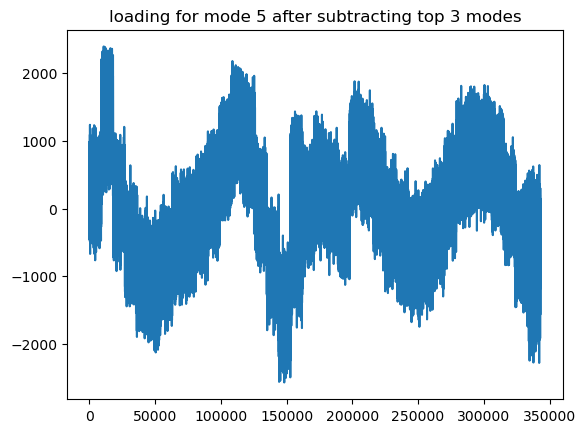

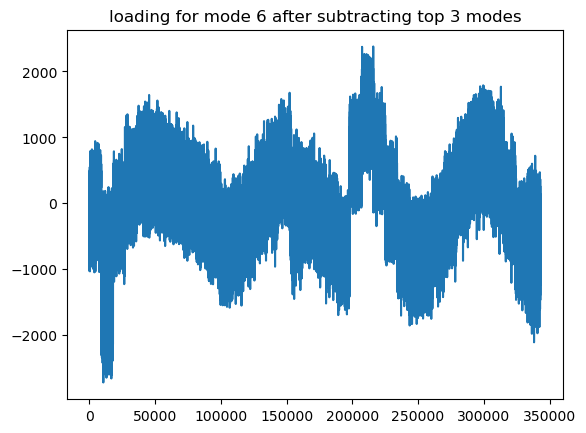

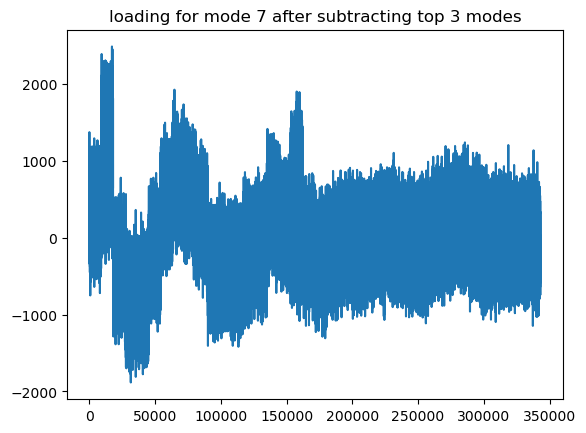

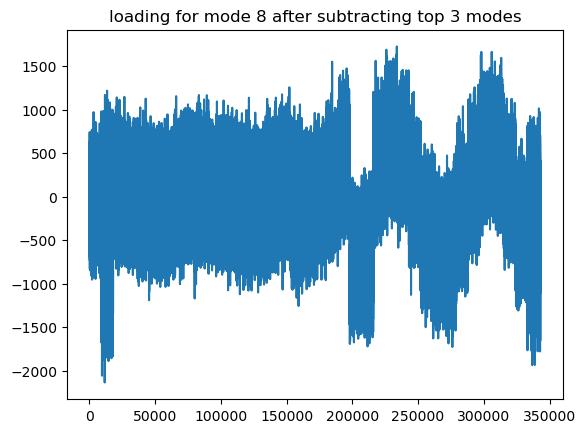

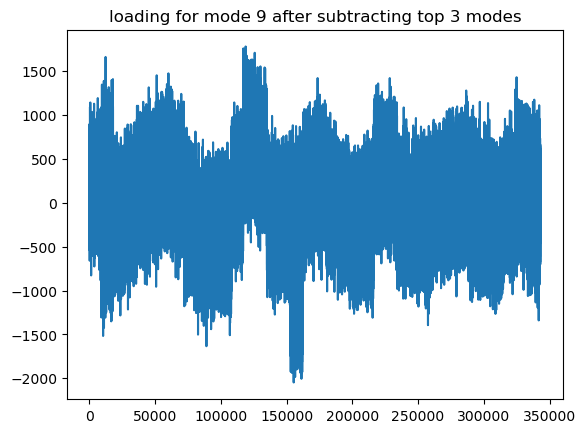

In [27]:
loadings_ = B@pca_.components_.T
for i in range(n_comps):
    plt.plot(loadings_[i]);    
    plt.title('loading for mode {} after subtracting top 3 modes'.format(i))
    plt.show()

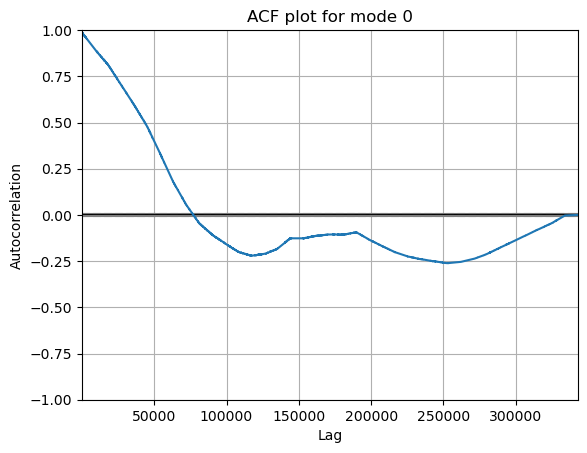

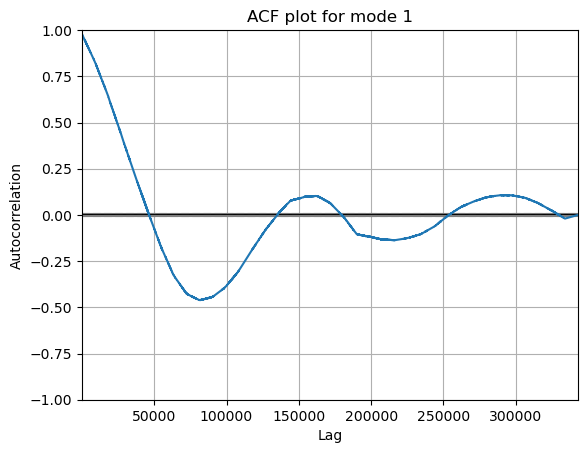

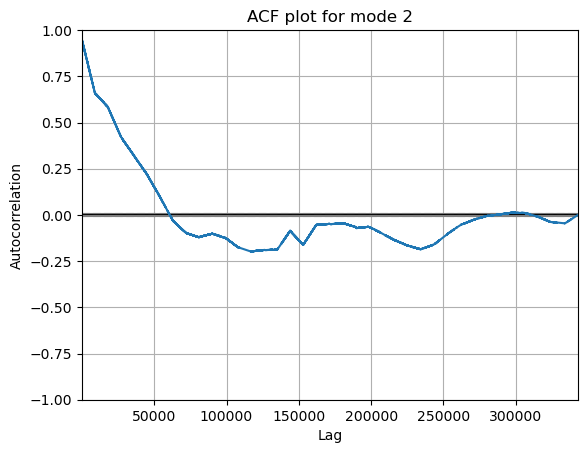

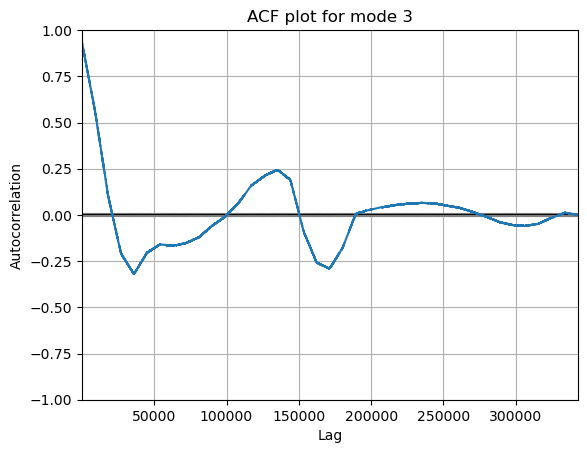

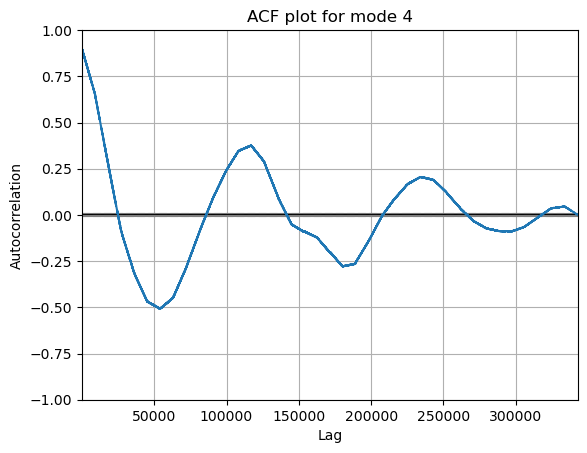

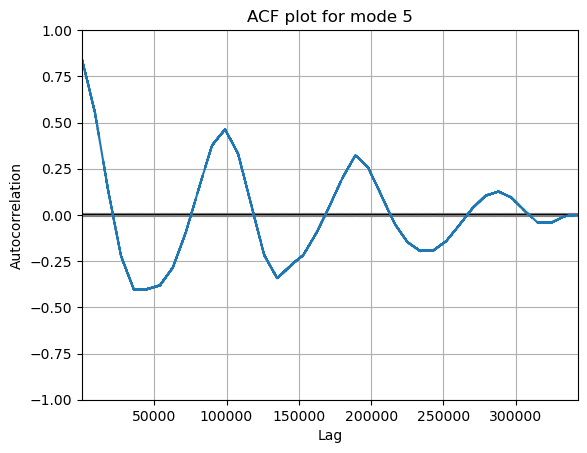

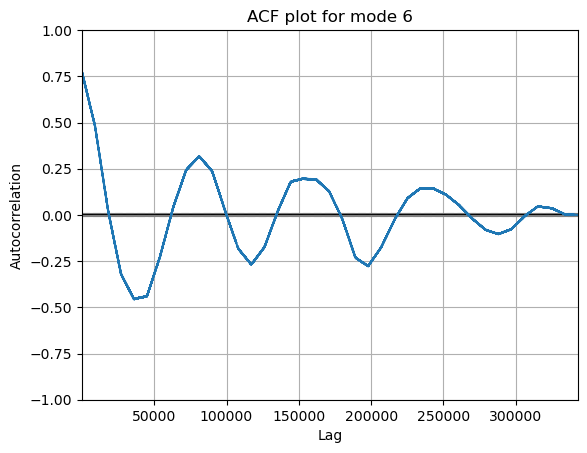

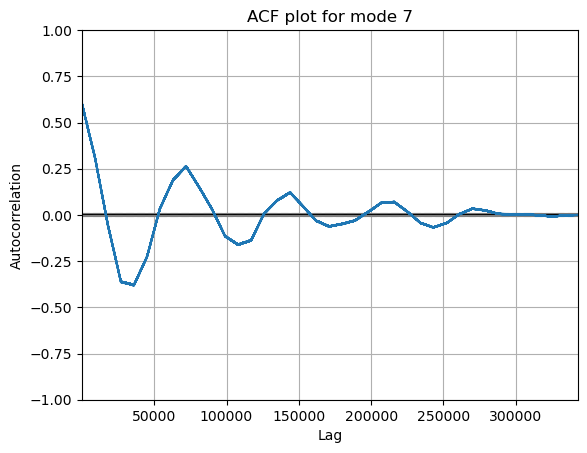

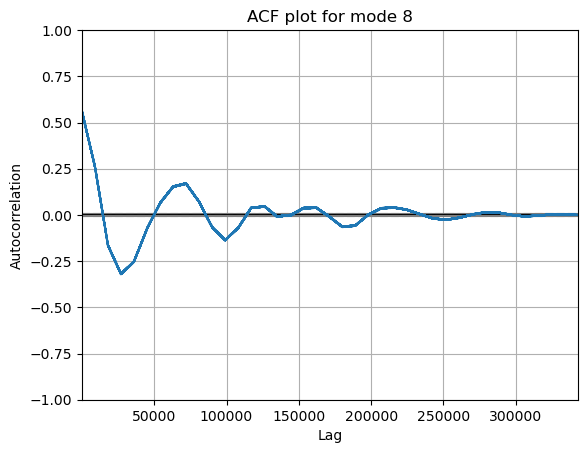

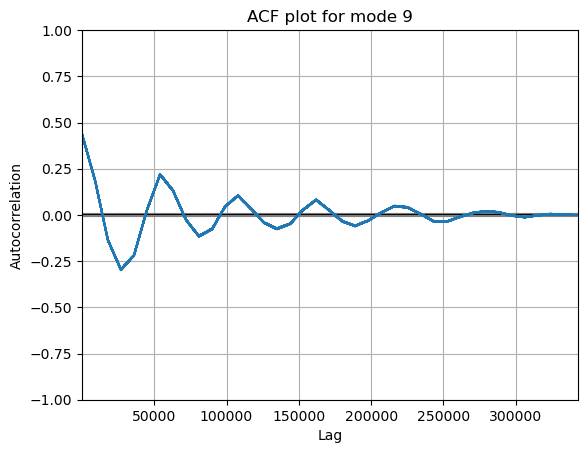

In [28]:
for i in range(n_comps):
    pd.plotting.autocorrelation_plot(loadings_[i])
    plt.title('ACF plot for mode {}'.format(i))
    plt.show()

Text(0.5, 1.0, 'ACF plot for temperature')

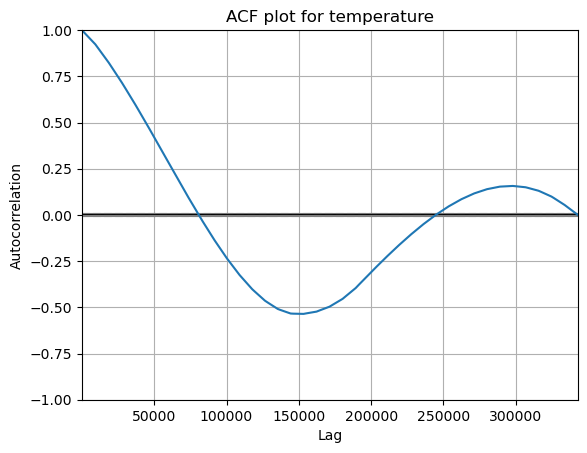

In [29]:

pd.plotting.autocorrelation_plot(y)
plt.title('ACF plot for temperature')

In [30]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_c = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
#X_reduced_train = pca.fit_transform(X_train) 
pca_c.fit_transform(C) 

array([[-1651.22376008, -1018.42479165,    92.78450392, ...,
         -816.2895574 ,  -180.42468395,  -658.78535958],
       [-1880.8689277 ,  -680.192358  ,   139.90769338, ...,
         -536.55333574,  -714.67599476,  -146.86162398],
       [-1579.92273275,  -146.75447905,  -151.27231015, ...,
          -24.67137407,    42.90456818,  -469.14428443],
       ...,
       [ 4680.03374989, -3682.07849418, -2686.89251365, ...,
         -413.3863361 ,  -289.09510311,   181.55754418],
       [ 4585.85323452, -3070.79377265, -1918.26387702, ...,
         -566.42446588,   449.65084199,   106.27352996],
       [ 4704.03279055, -2834.06312723, -1862.77633245, ...,
         -611.45583043,   112.60368883,   748.57075526]])

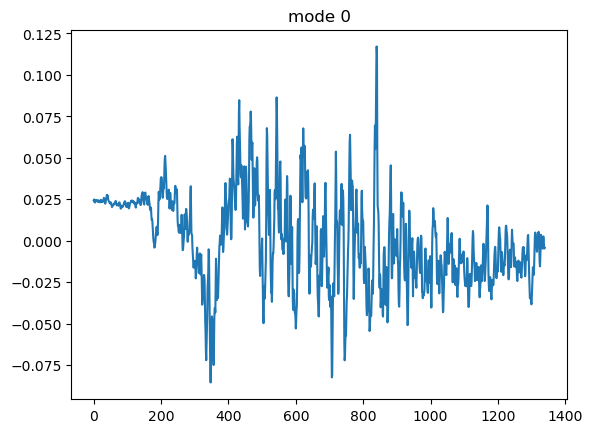

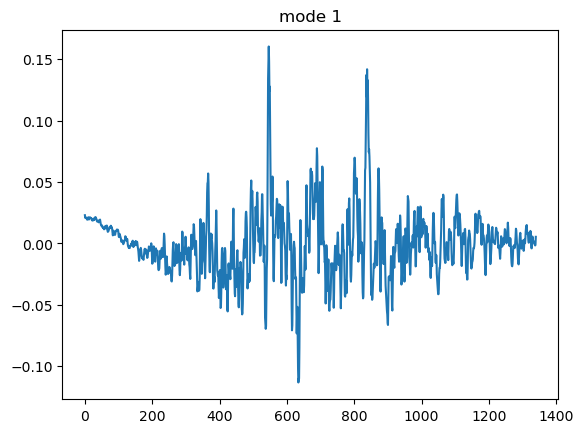

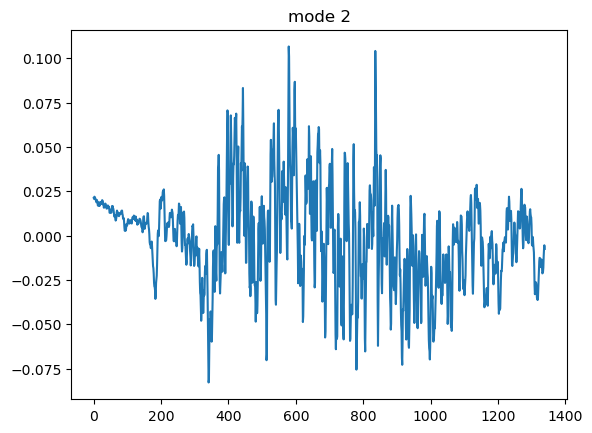

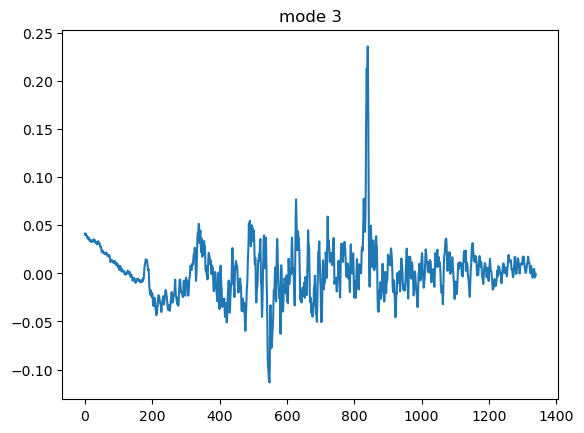

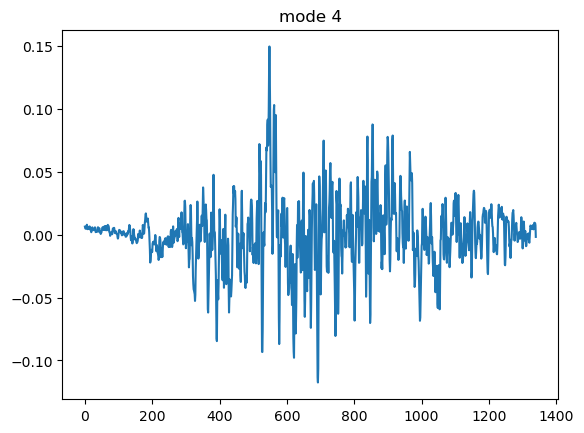

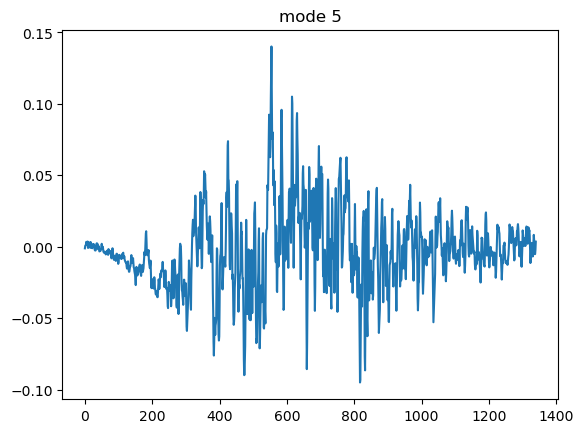

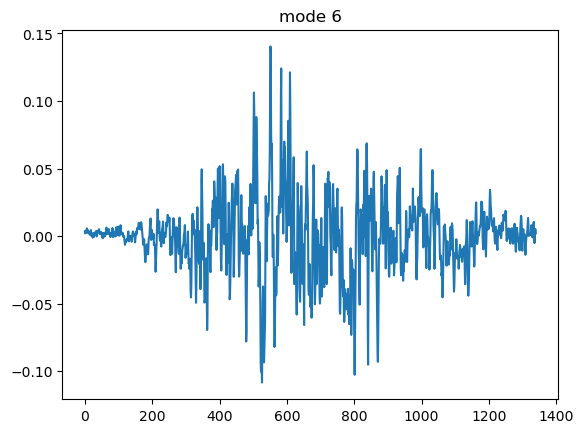

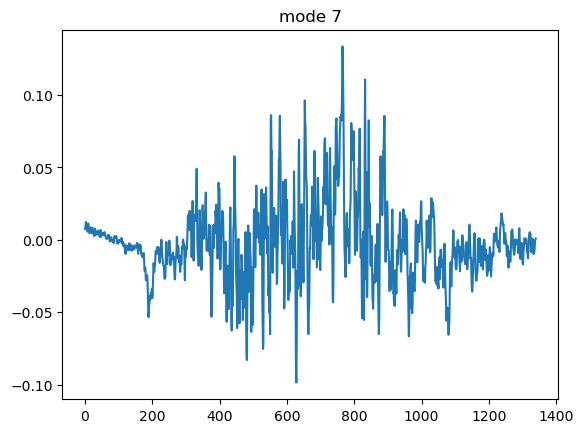

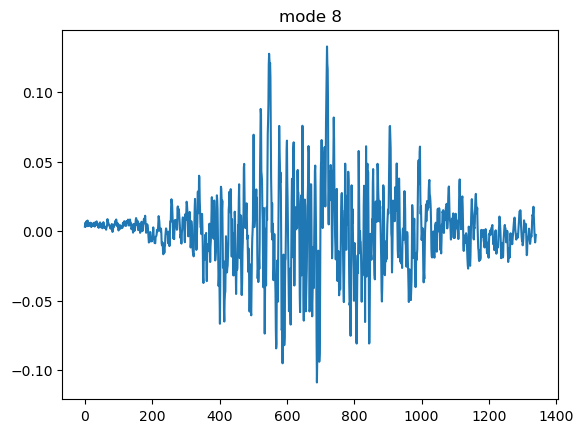

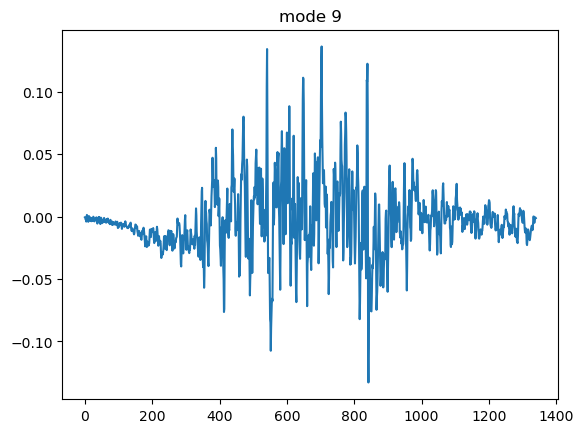

In [31]:
for i in range(n_comps):
    plt.plot(pca_.components_[i,:].T);
    plt.title('mode {}'.format(i))
    plt.show()

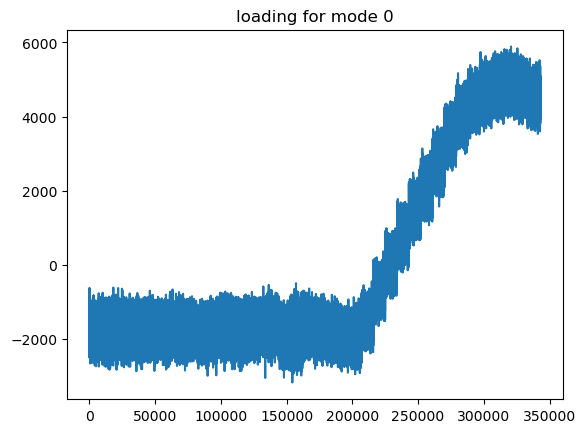

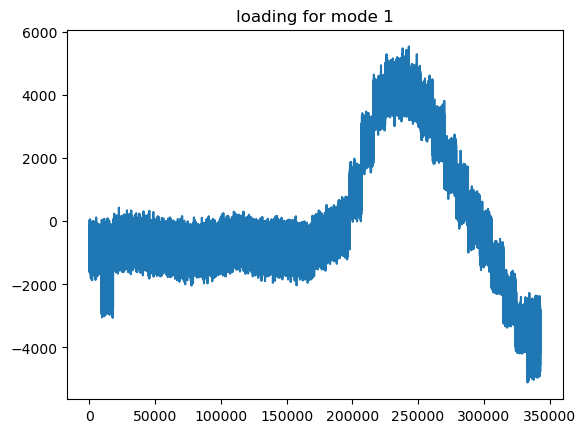

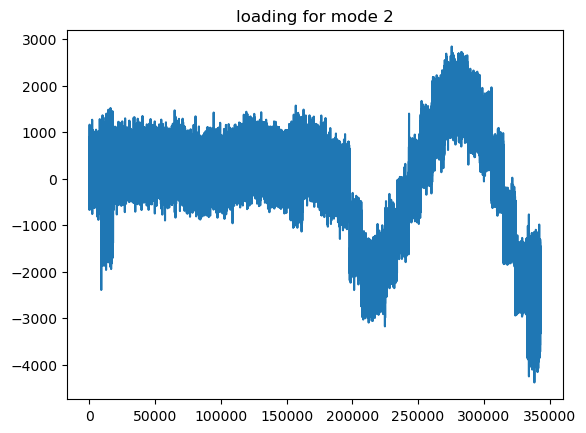

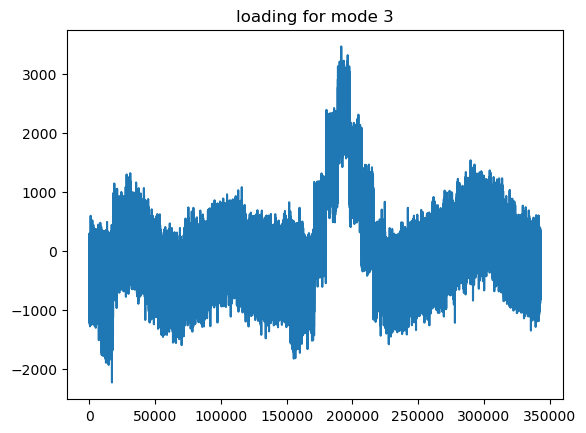

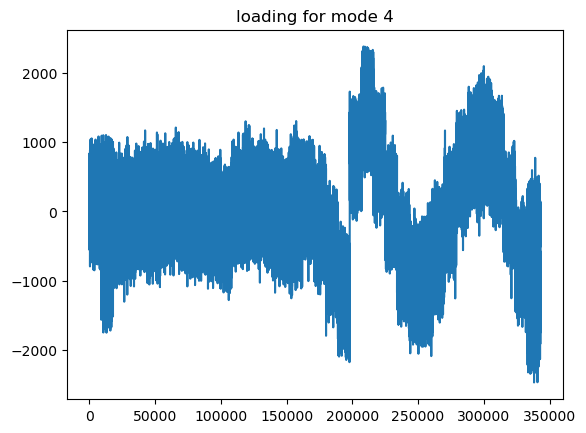

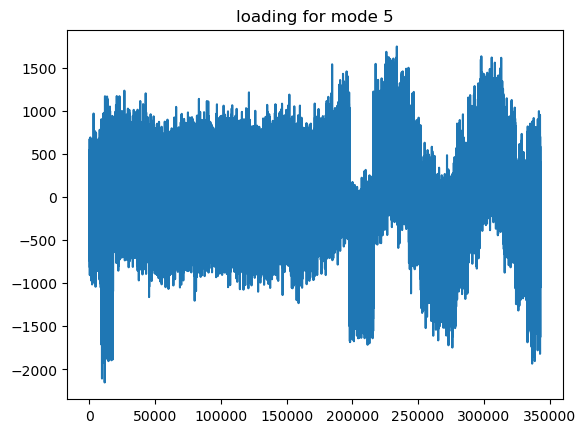

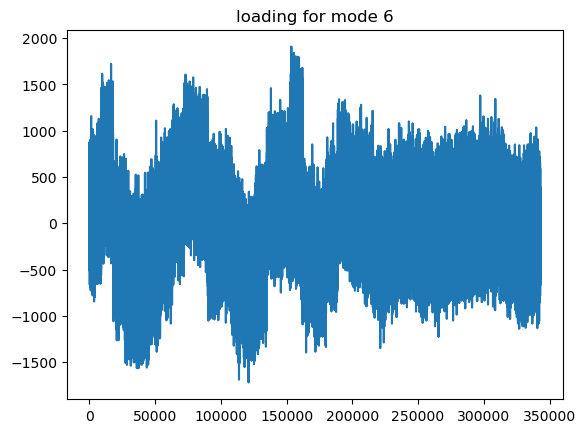

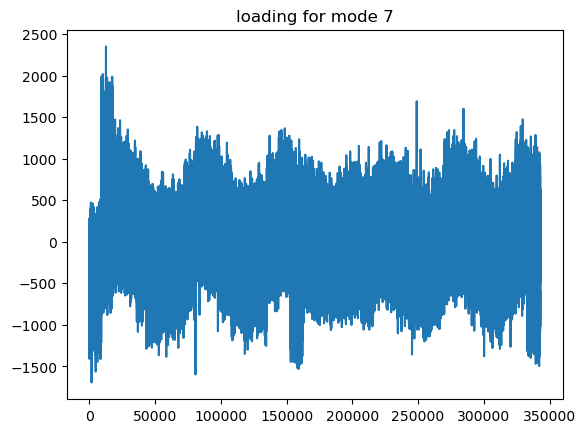

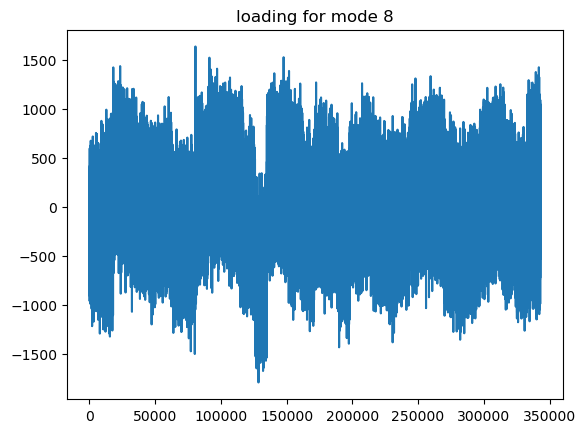

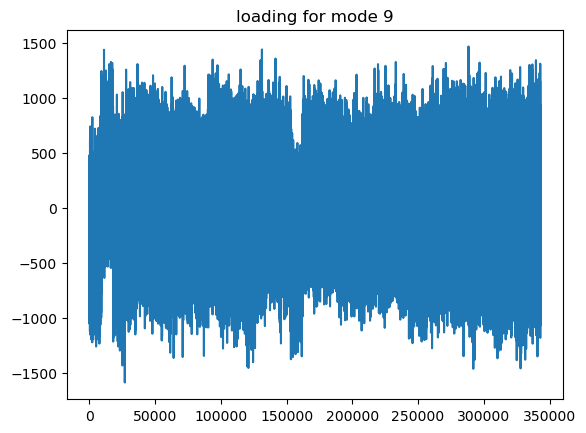

In [32]:
loadings_c = C@pca_c.components_.T
for i in range(n_comps):
    plt.plot(loadings_c[i]);    
    plt.title('loading for mode {}'.format(i))
    plt.show()

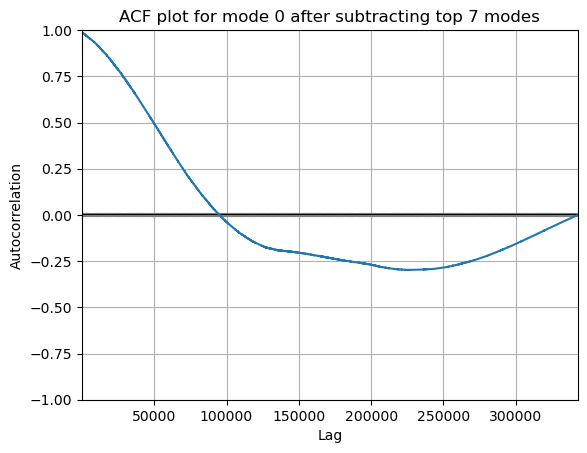

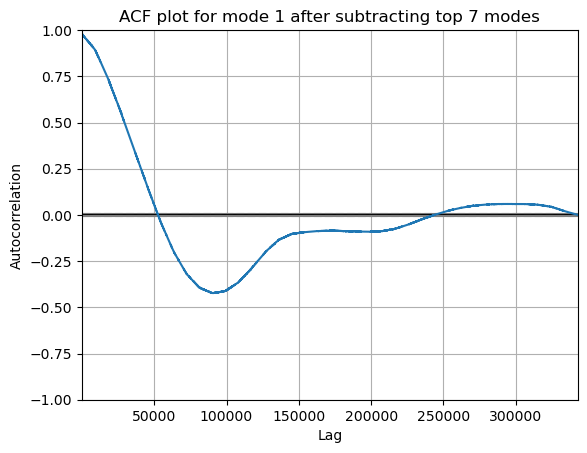

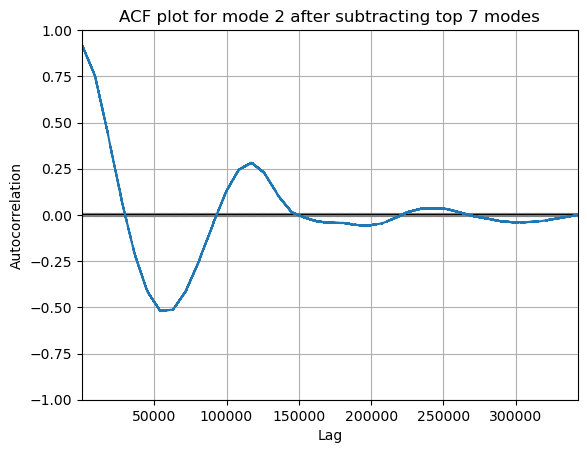

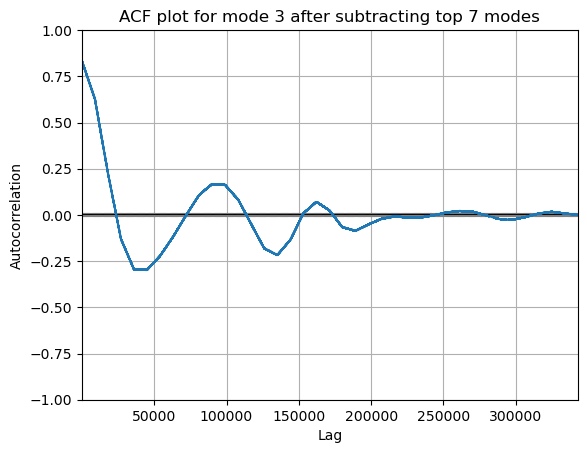

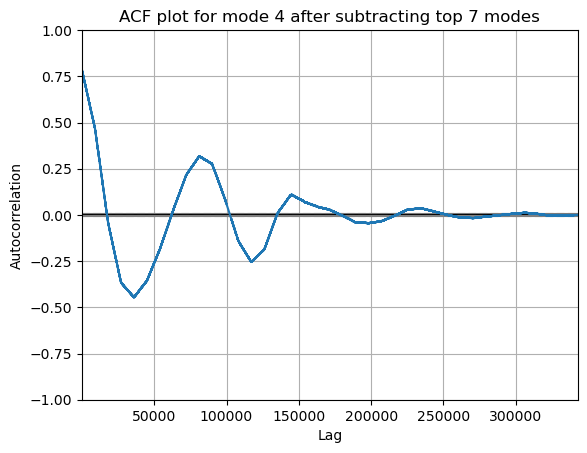

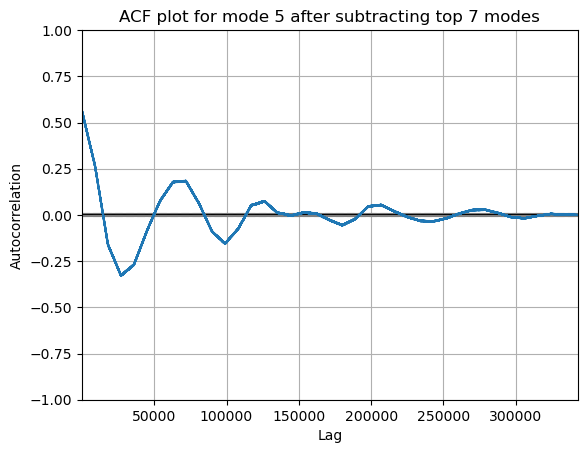

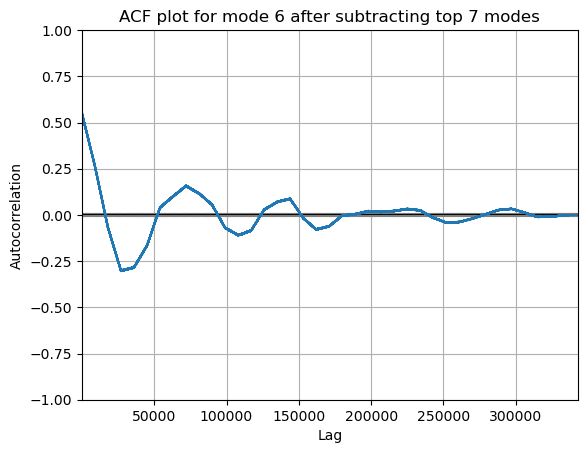

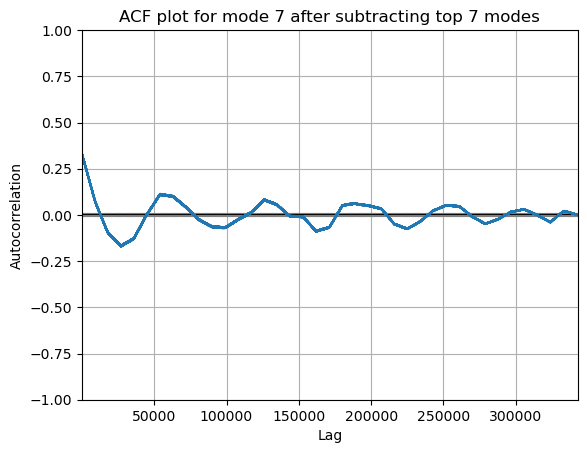

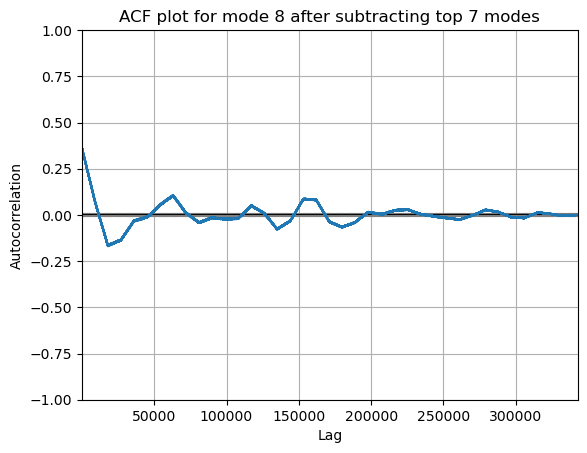

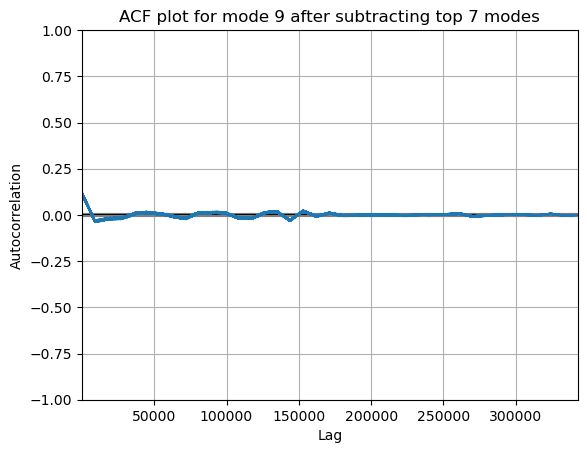

In [33]:
for i in range(n_comps):
    pd.plotting.autocorrelation_plot(loadings_c[i])
    plt.title('ACF plot for mode {} after subtracting top 7 modes'.format(i))
    plt.show()

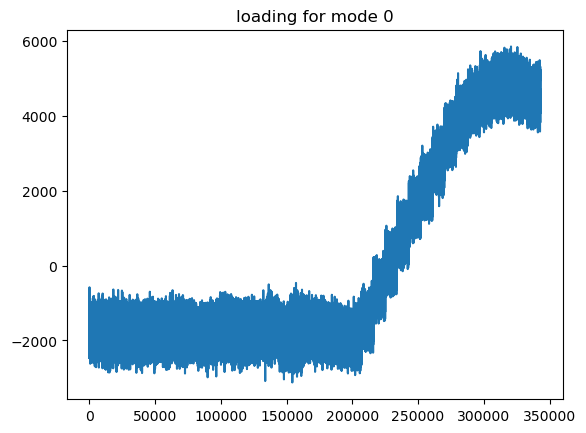

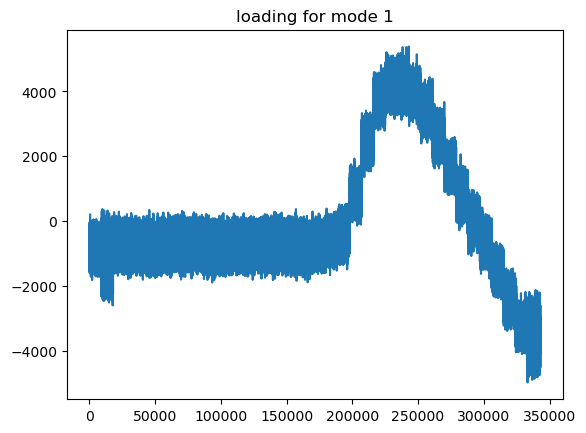

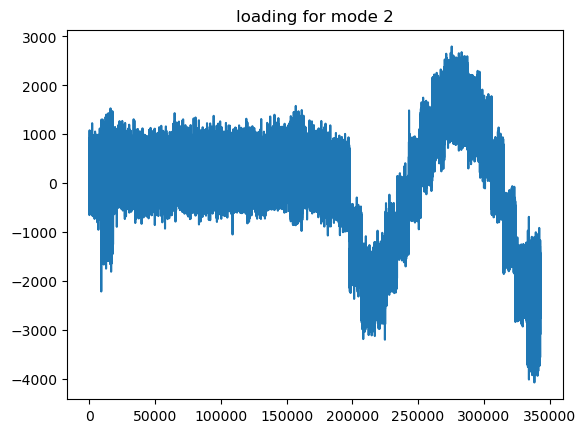

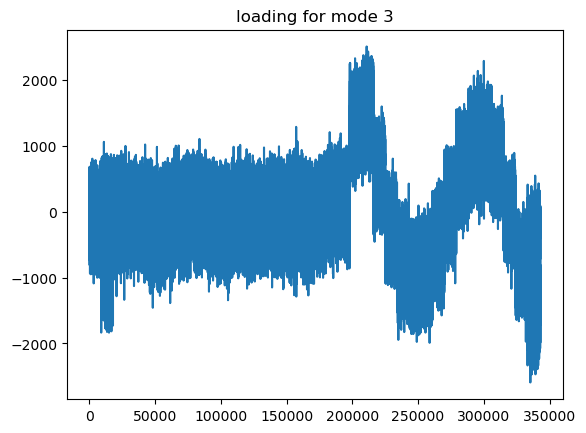

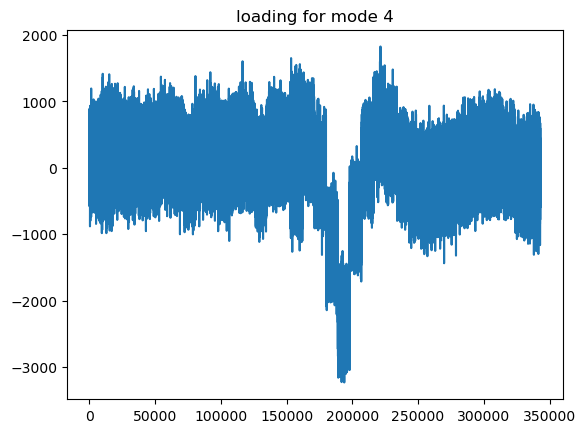

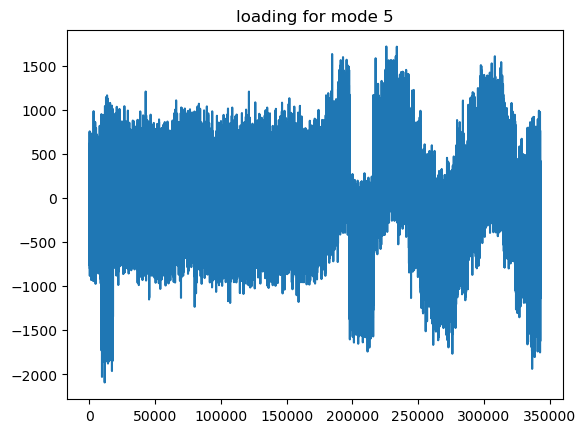

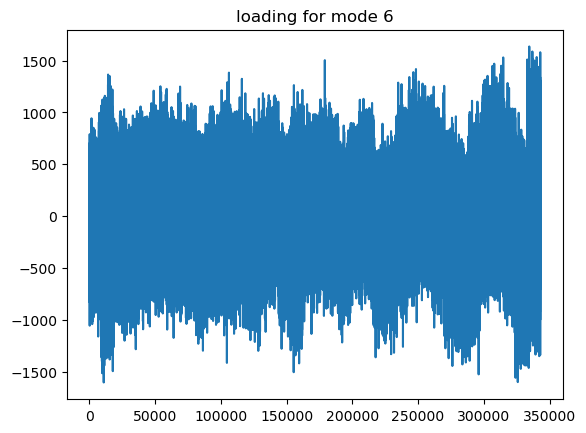

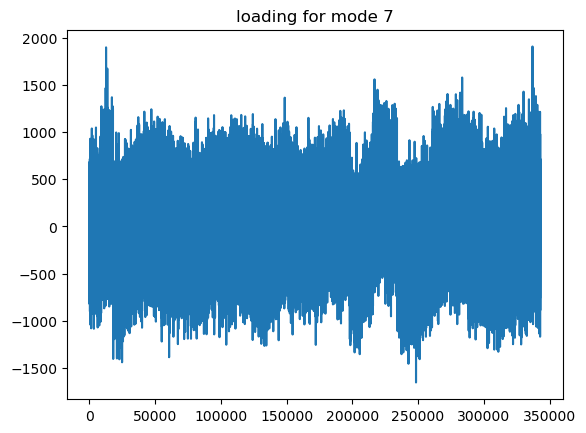

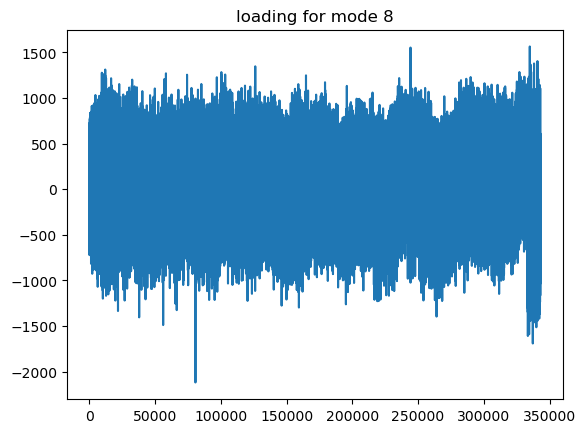

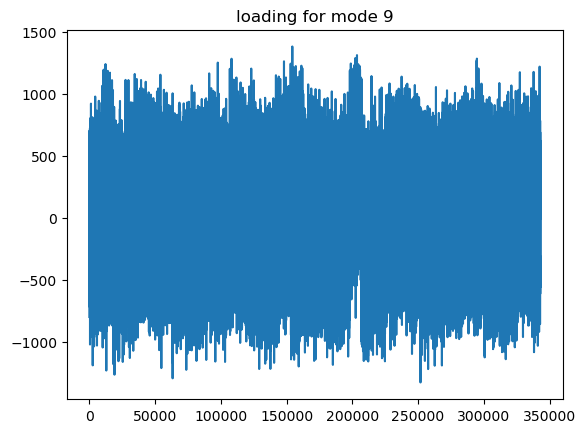

In [34]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_d = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
#X_reduced_train = pca.fit_transform(X_train) 
pca_d.fit_transform(D) 

# compute loadings
loadings_d = D@pca_d.components_.T
for i in range(n_comps):
    plt.plot(loadings_d[i]);    
    plt.title('loading for mode {}'.format(i))
    plt.show()

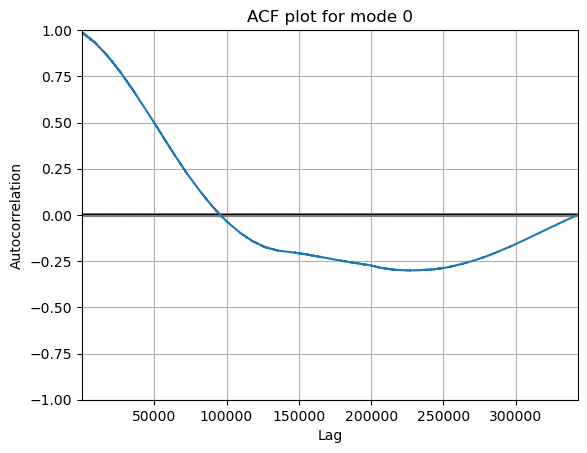

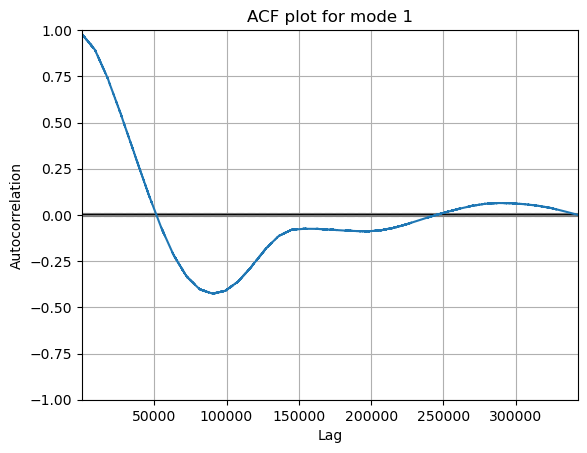

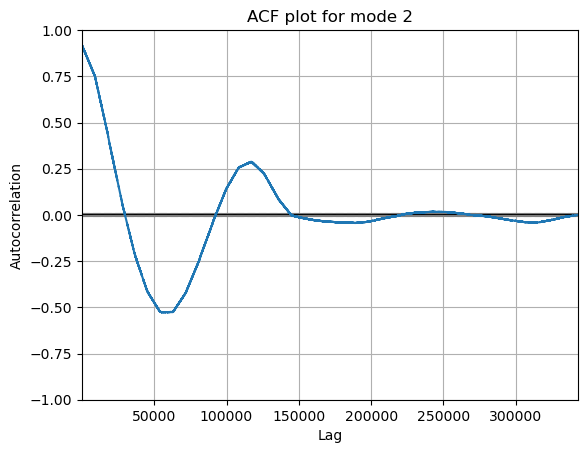

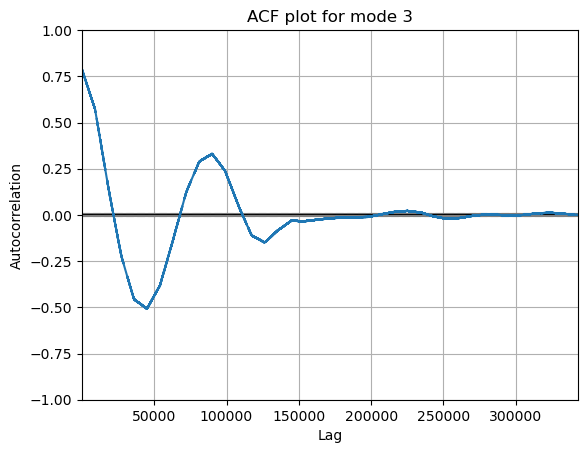

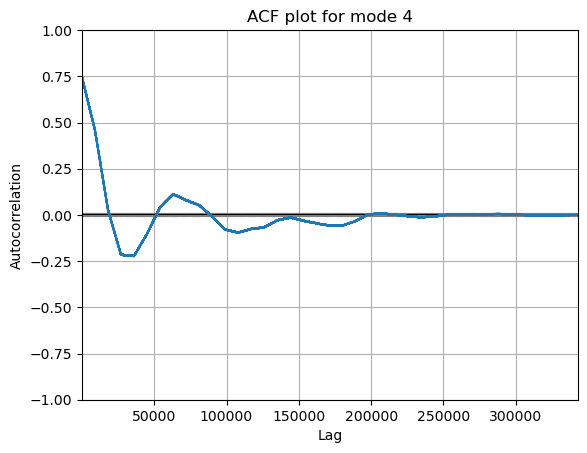

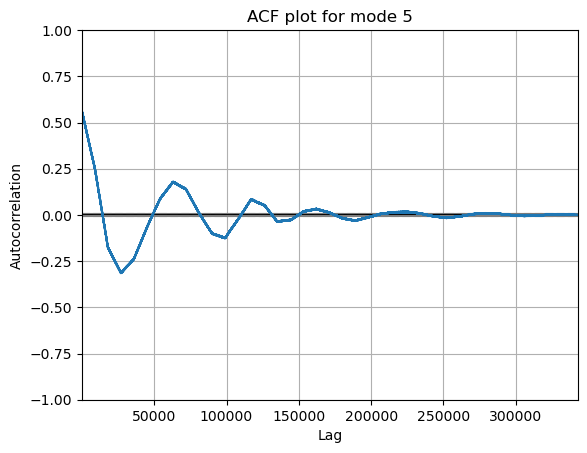

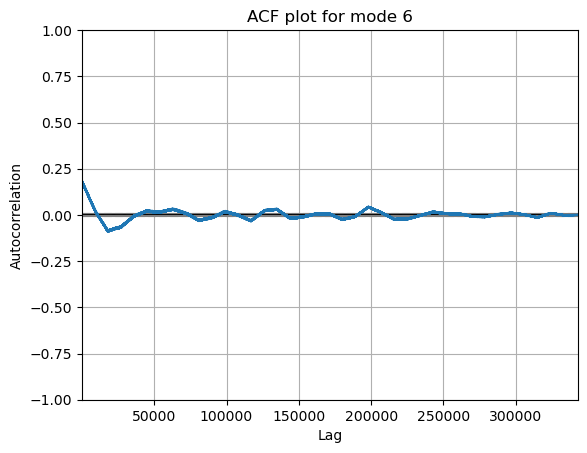

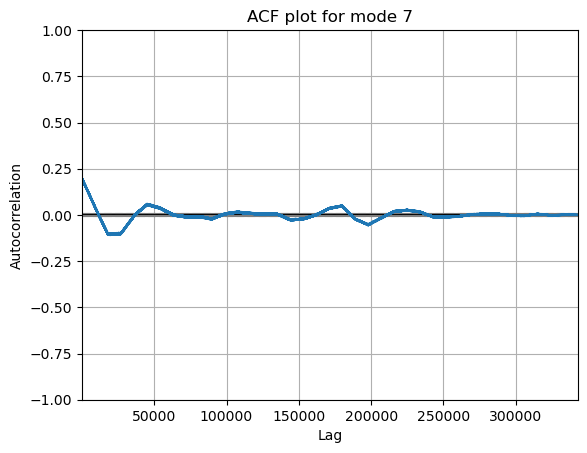

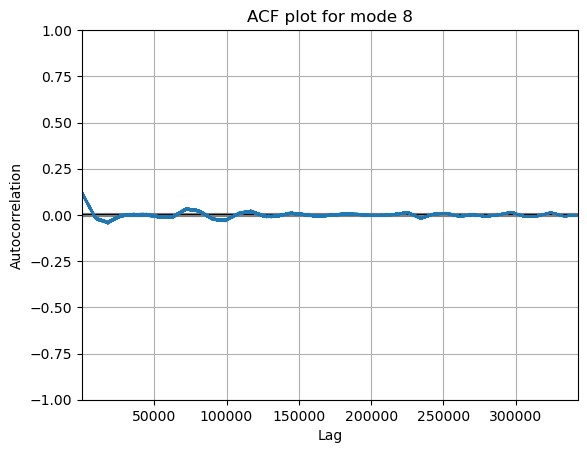

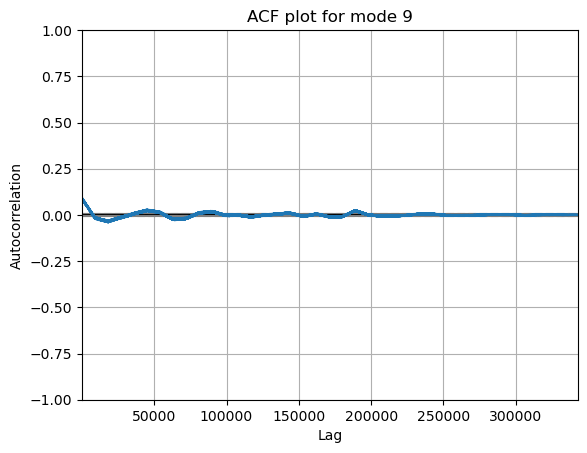

In [35]:
for i in range(n_comps):
    pd.plotting.autocorrelation_plot(loadings_d[i])
    plt.title('ACF plot for mode {}'.format(i))
    plt.show()

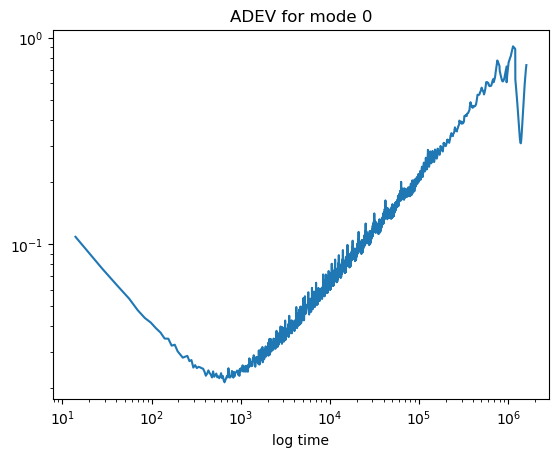

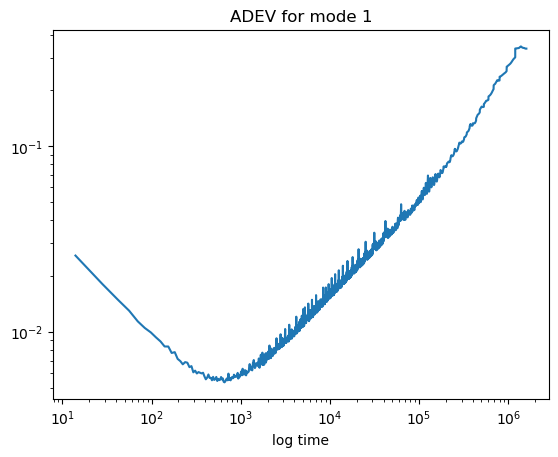

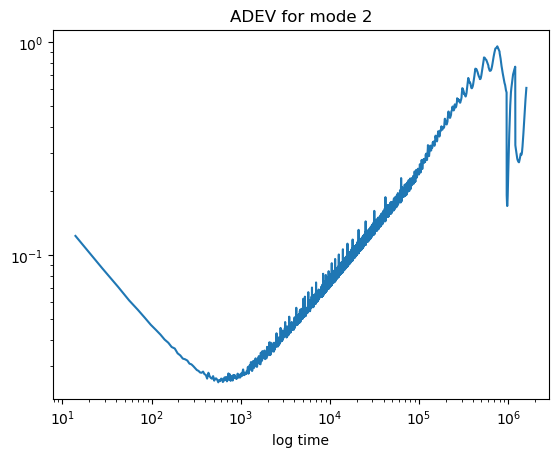

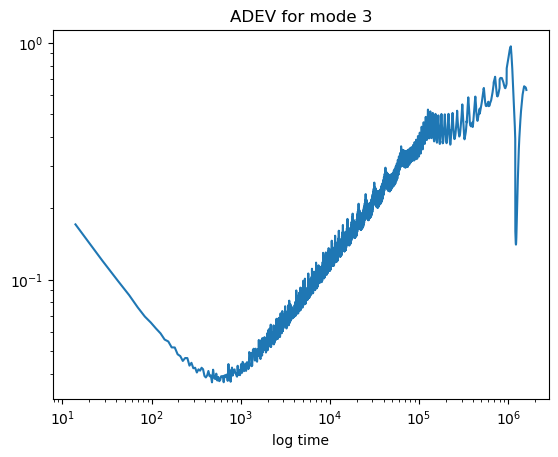

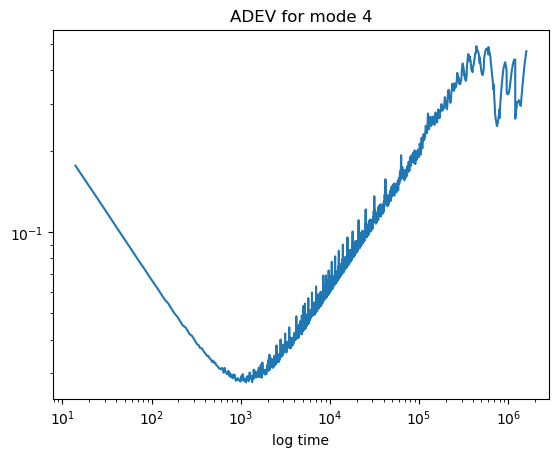

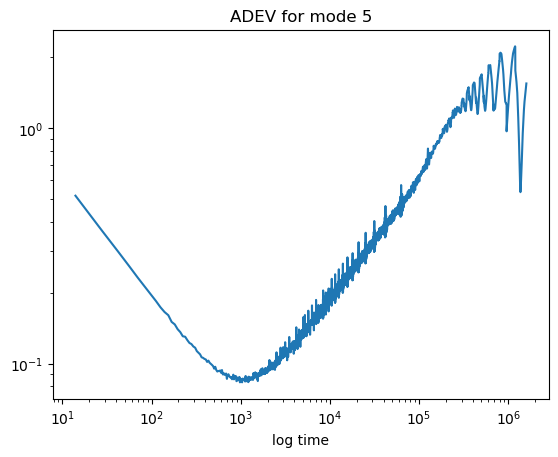

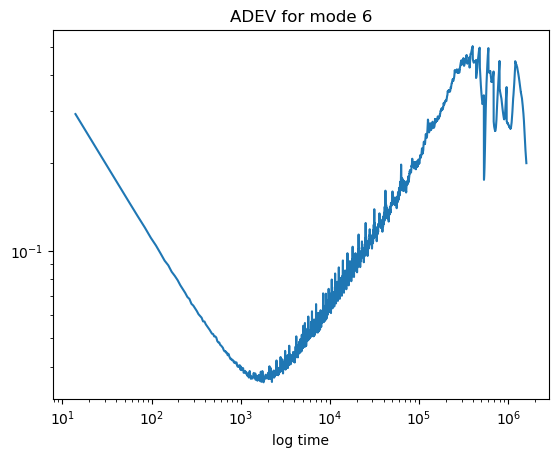

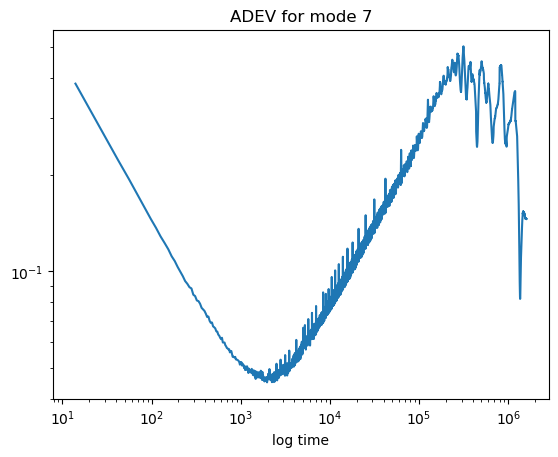

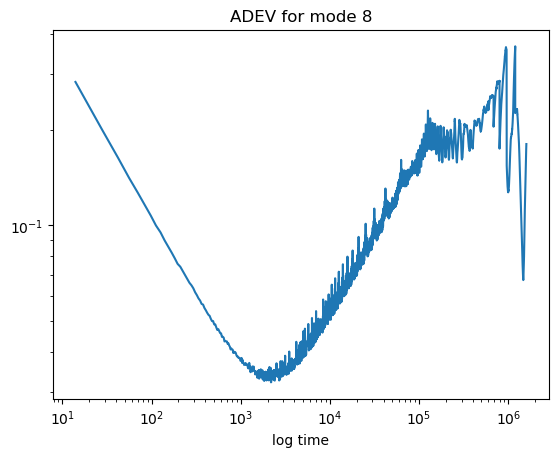

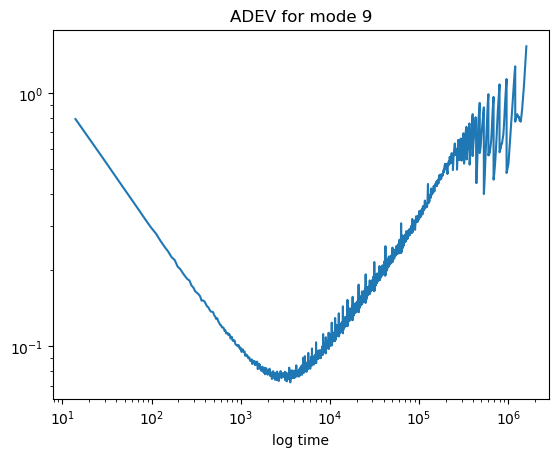

<Figure size 640x480 with 0 Axes>

In [37]:
# perform Adev computation mode by mode on loadings from pca on mean centered data


for j in range(n_comps):
    ### amplitude
    yd = loadings_gw[time_step][j]/loadings_gw[time_step][j][0]  
    #plt.plot(yd);    
    #plt.title('normalized loading for mode {}'.format(j)) #after subtracting top 3 modes
    #plt.show()
    t= np.logspace(0,10,100)
    r=1/14 # sample rate
    (t2, ad, ade, adn) = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    fig = plt.loglog(t2, ad)
    plt.title('ADEV for mode {}'.format(j))
    plt.xlabel('log time')
    plt.figure()

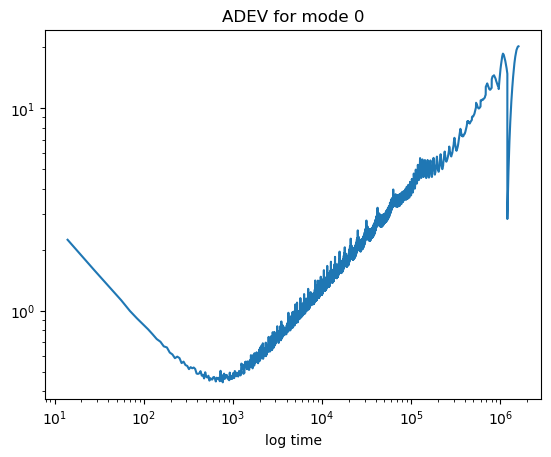

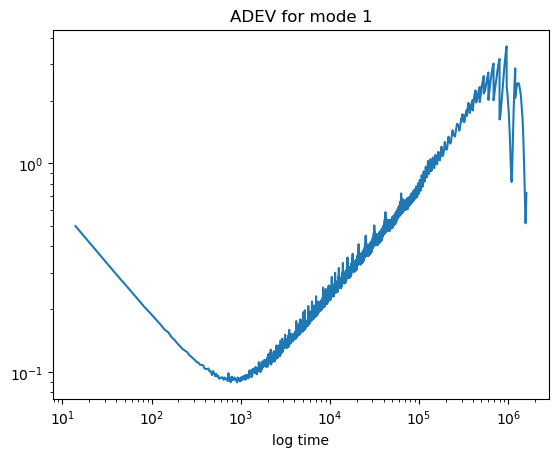

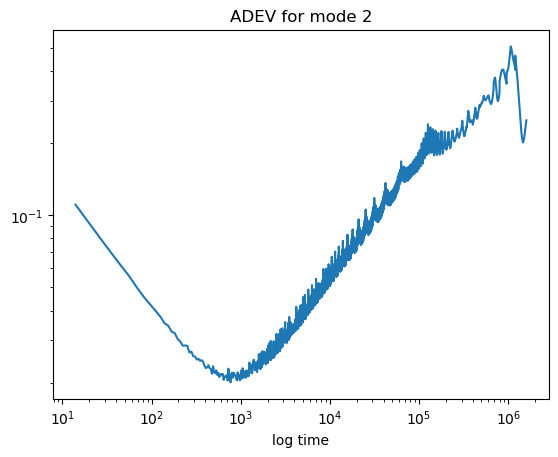

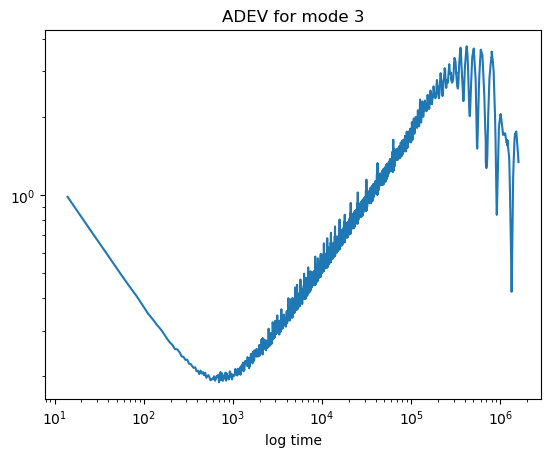

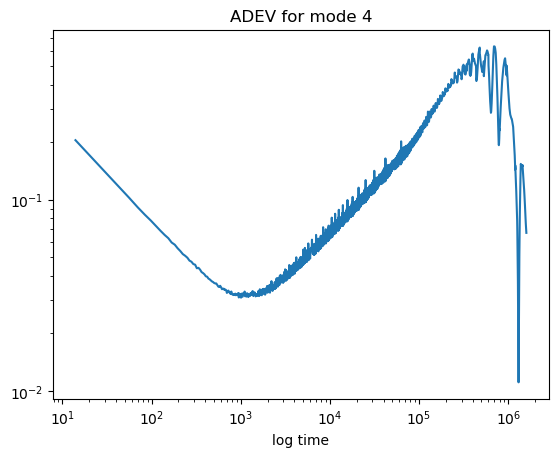

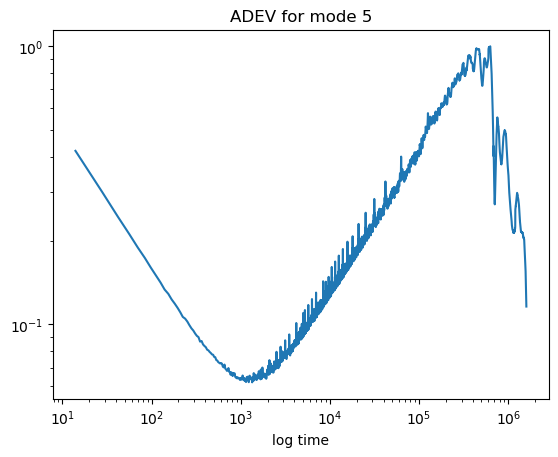

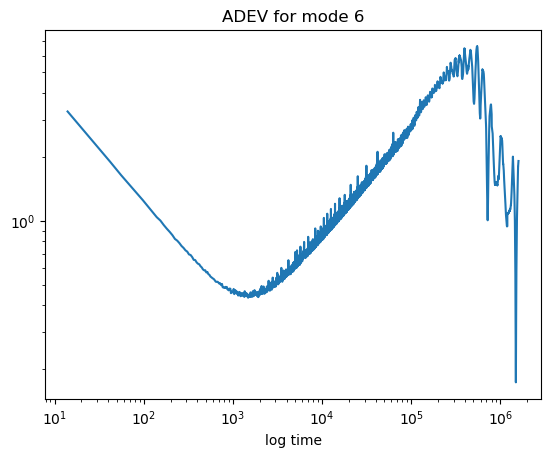

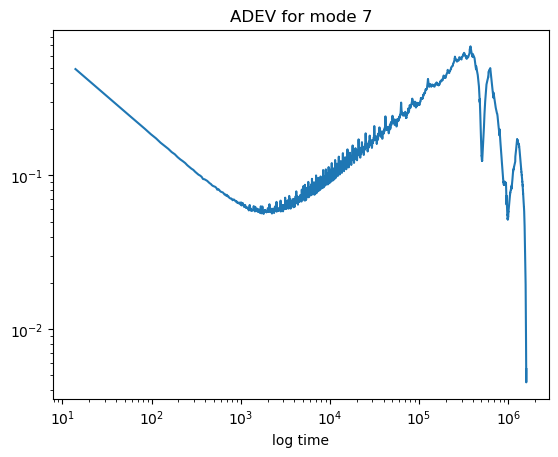

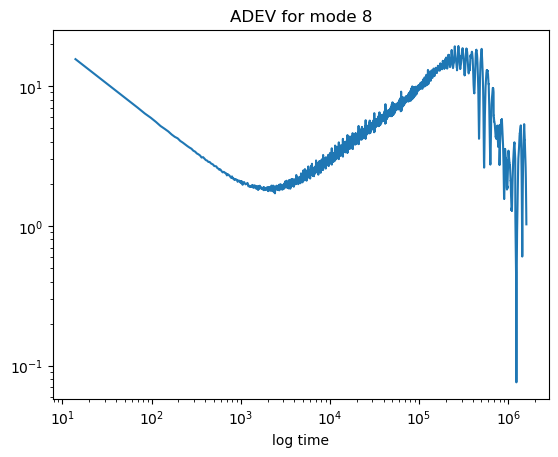

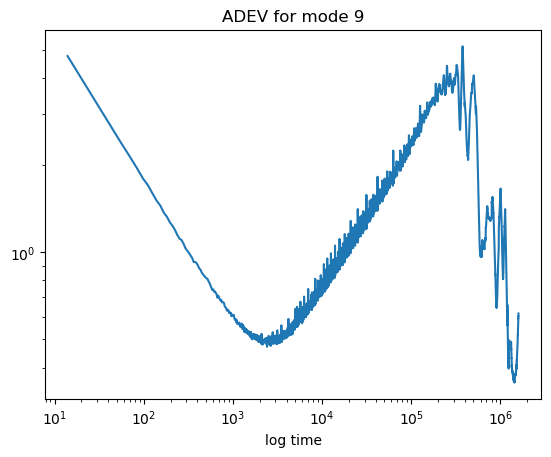

<Figure size 640x480 with 0 Axes>

In [38]:
# perform Adev computation mode by mode on loadings from pca perfromed on data with top 3 modes subtracted

for j in range(n_comps):
    ### amplitude
    yd = loadings_[j]/loadings_[j][0]  
    #plt.plot(yd);    
    #plt.title('normalized loading for mode {}'.format(j)) #after subtracting top 3 modes
    #plt.show()
    t= np.logspace(0,10,100)
    r=1/14 # sample rate
    (t2, ad, ade, adn) = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    fig = plt.loglog(t2, ad)
    plt.title('ADEV for mode {}'.format(j))
    plt.xlabel('log time')
    plt.figure()

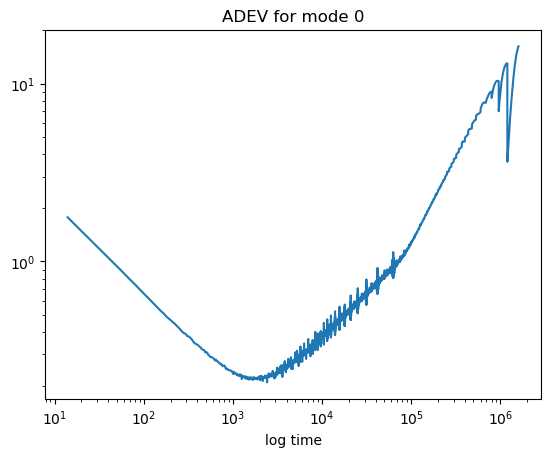

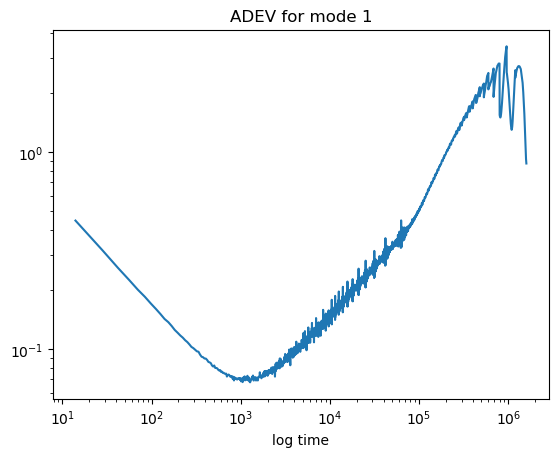

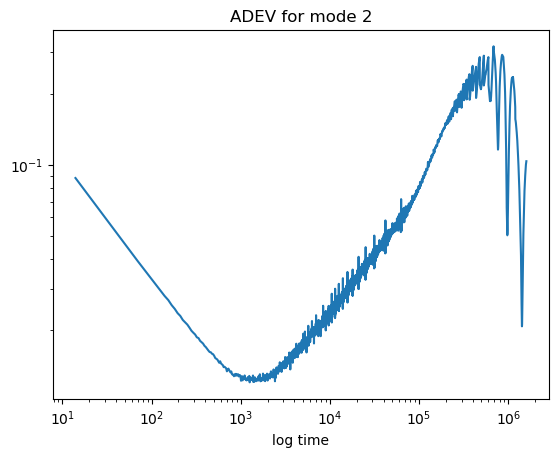

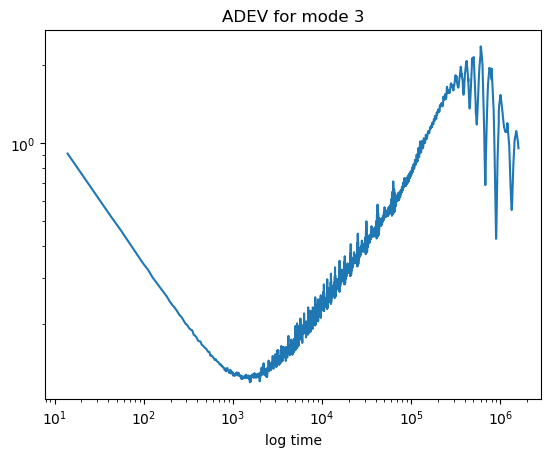

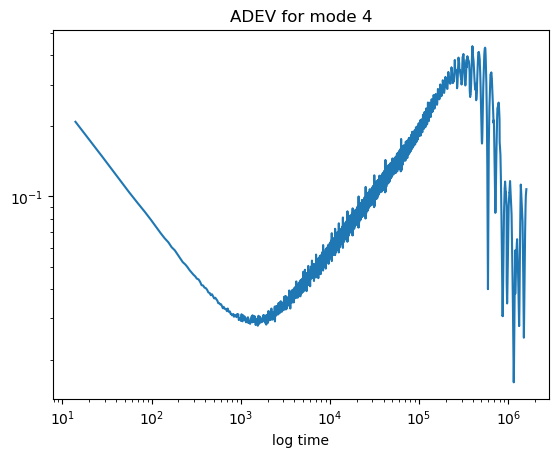

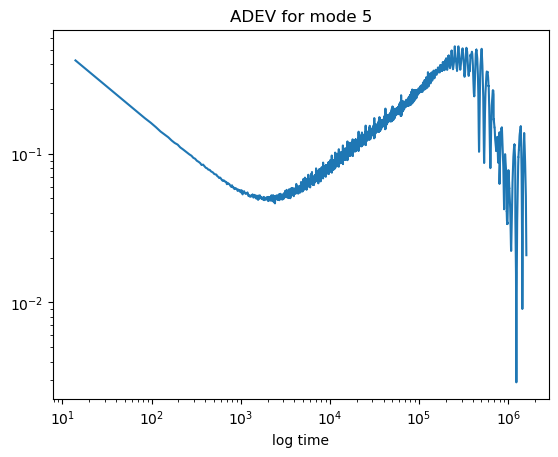

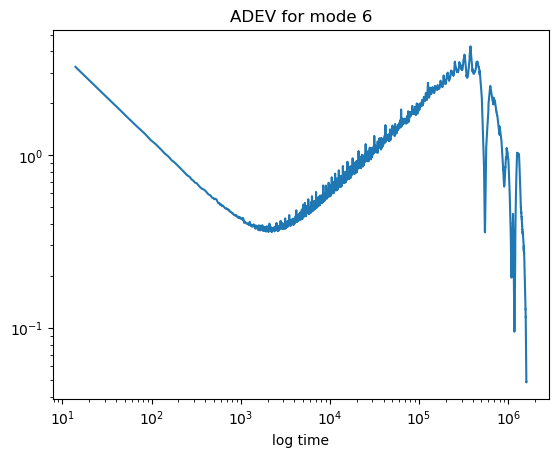

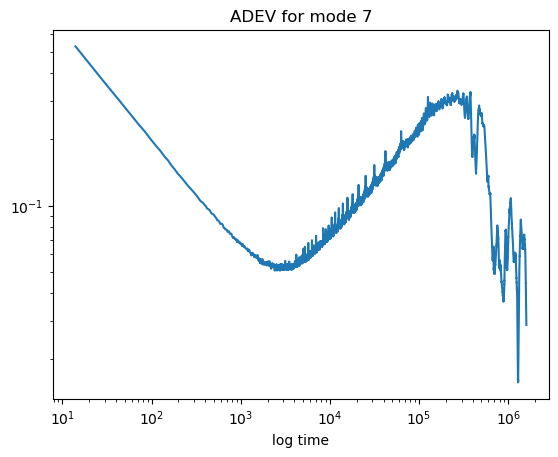

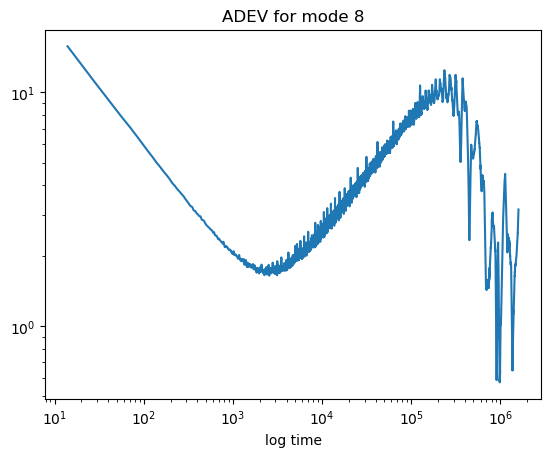

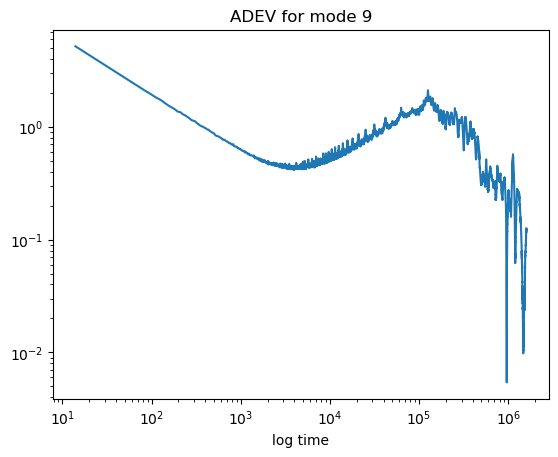

<Figure size 640x480 with 0 Axes>

In [39]:
# perform Adev computation mode by mode on loadings from pca perfromed on data with top 3 modes subtracted

for j in range(n_comps):
    ### amplitude
    yd = loadings_c[j]/loadings_[j][0]  
    #plt.plot(yd);    
    #plt.title('normalized loading for mode {}'.format(j)) #after subtracting top 3 modes
    #plt.show()
    t= np.logspace(0,10,100)
    r=1/14 # sample rate
    (t2, ad, ade, adn) = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    fig = plt.loglog(t2, ad)
    plt.title('ADEV for mode {}'.format(j))
    plt.xlabel('log time')
    plt.figure()

In [ ]:
# perform Adev computation mode by mode on loadings from pca perfromed on data with top 3 modes subtracted

for j in range(n_comps):
    ### amplitude
    yd = loadings_d[j]/loadings_[j][0]  
    #plt.plot(yd);    
    #plt.title('normalized loading for mode {}'.format(j)) #after subtracting top 3 modes
    #plt.show()
    t= np.logspace(0,10,100)
    r=1/14 # sample rate
    (t2, ad, ade, adn) = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    fig = plt.loglog(t2, ad)
    plt.title('ADEV for mode {}'.format(j))
    plt.xlabel('log time')
    plt.figure()

In [40]:
#### subtract loadings_ from B  

time_step = 17
component_0 = pca_.components_[0]
mode_B_0 = np.array(component_0[0]).reshape(1, -1)*np.array(loadings_[0]).reshape(-1, 1)

In [41]:
BB = B - mode_B_0 

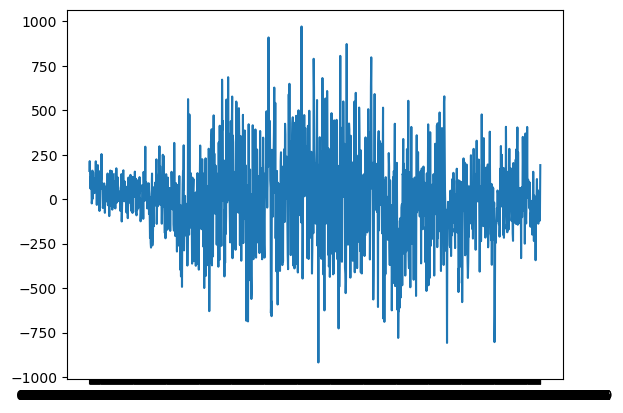

In [42]:
plt.plot(BB.iloc[0, :])


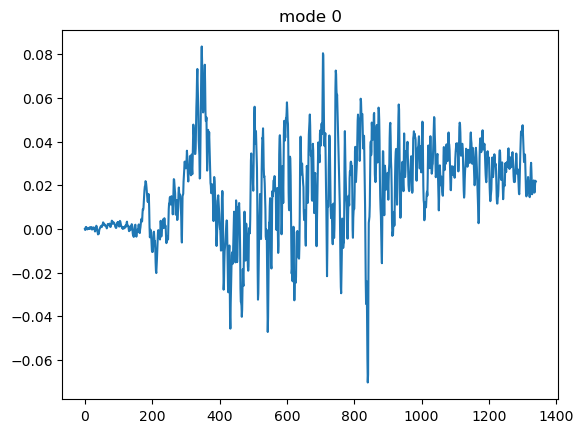

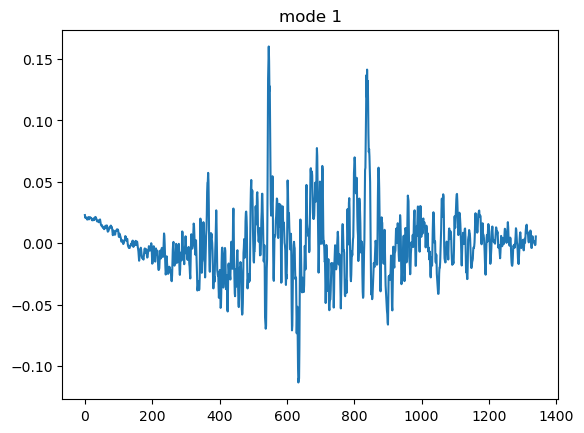

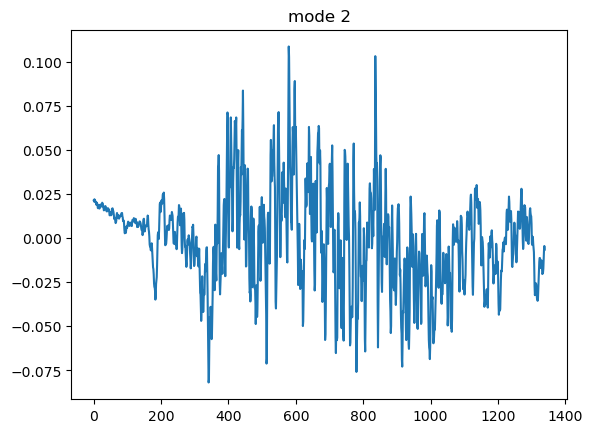

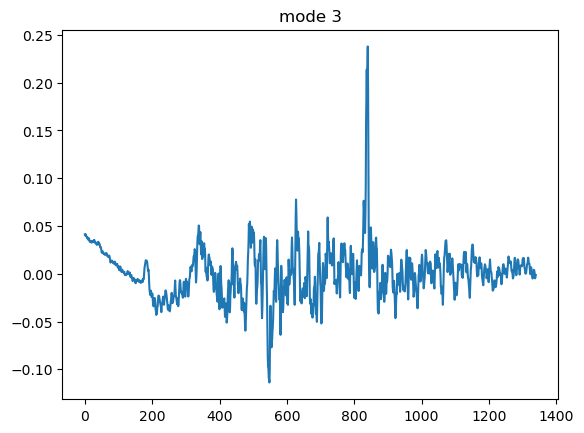

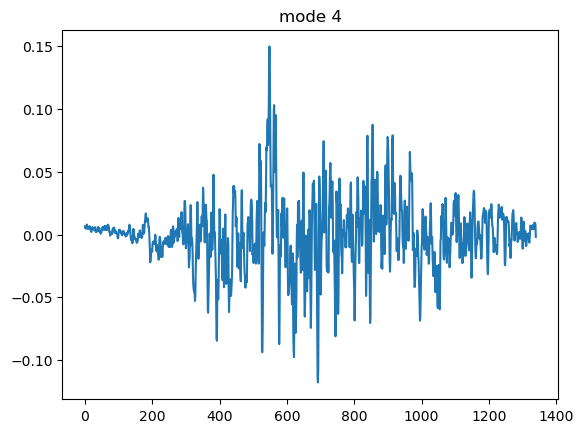

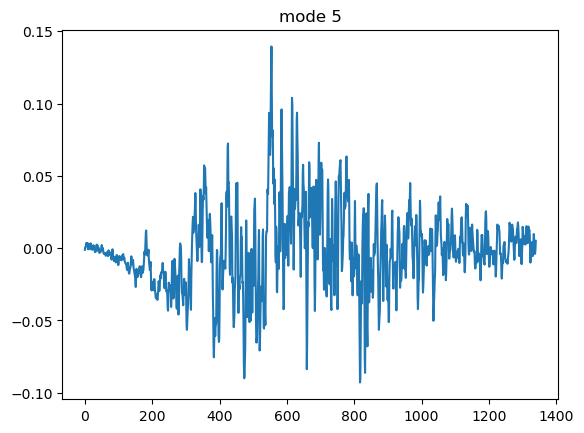

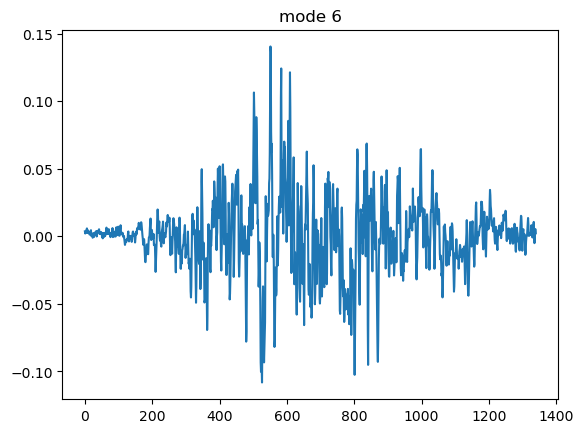

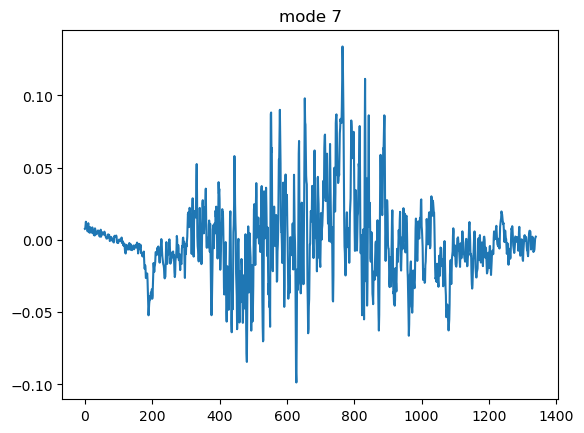

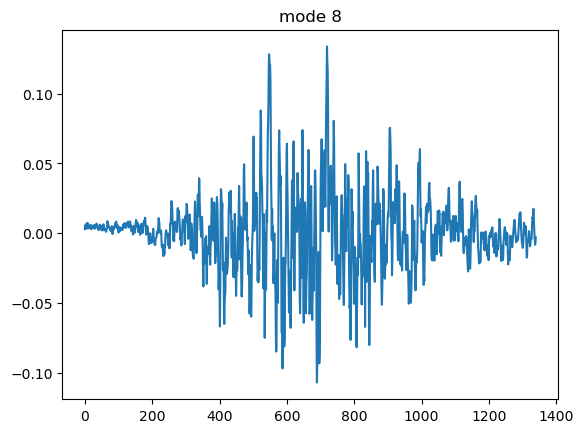

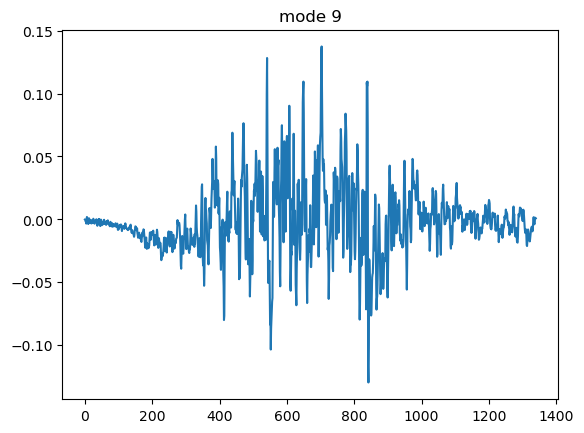

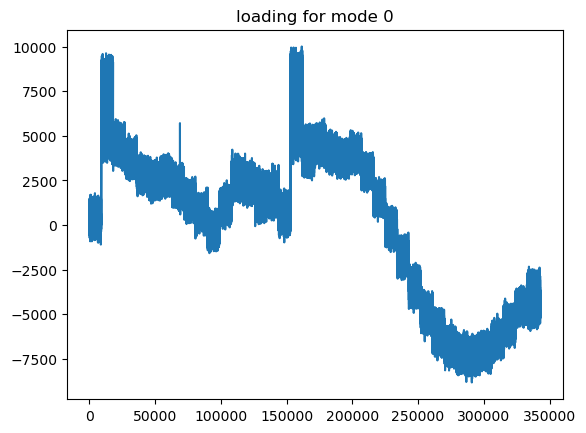

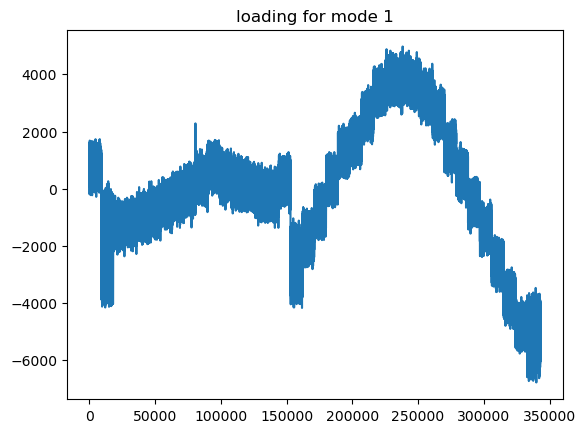

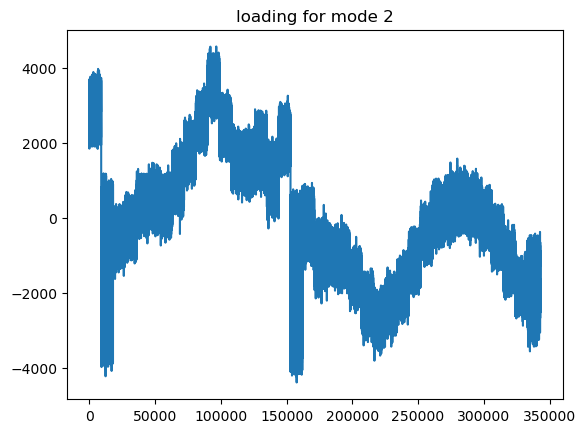

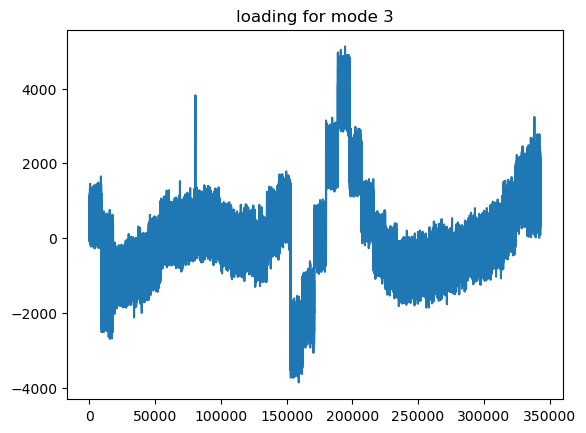

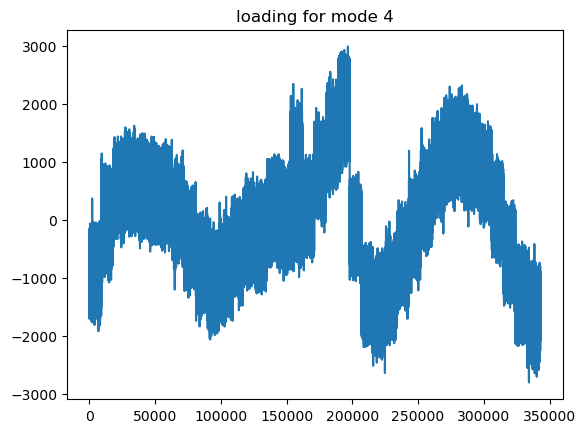

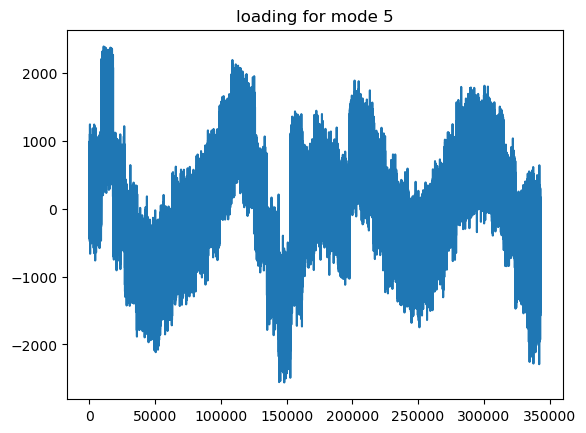

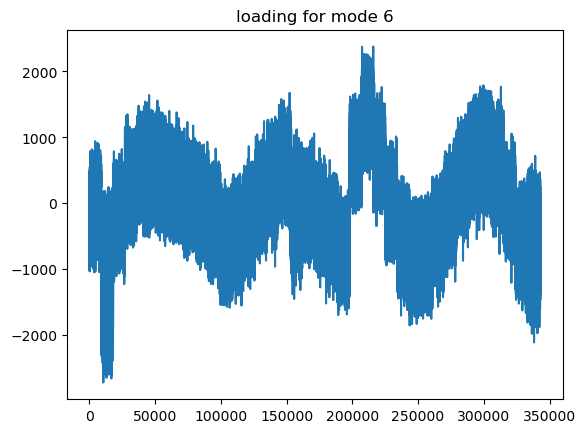

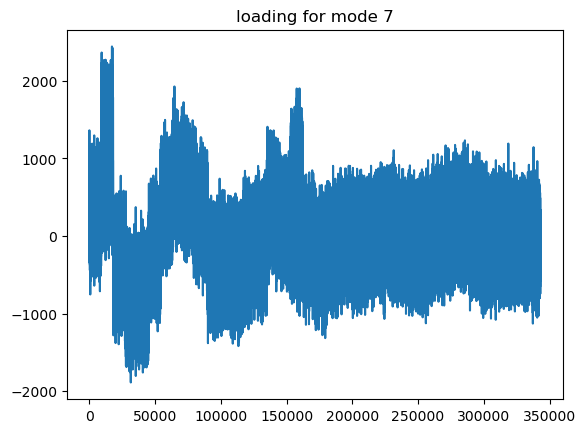

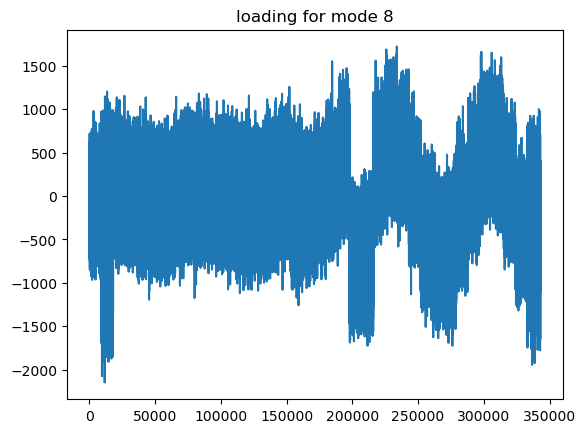

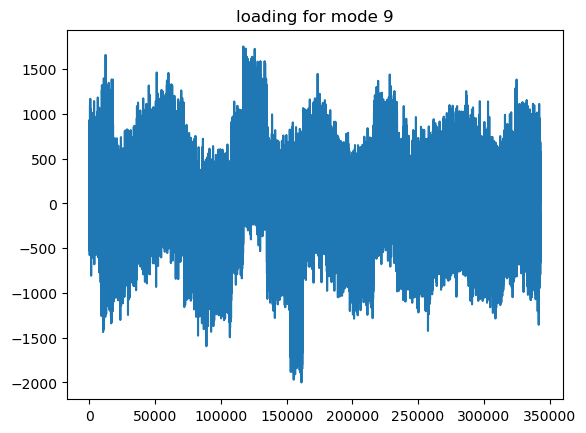

In [43]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
pca_bb = PCA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
#X_reduced_train = pca.fit_transform(X_train) 
pca_bb.fit_transform(BB) 

for i in range(n_comps):
    plt.plot(pca_bb.components_[i,:].T);
    plt.title('mode {}'.format(i))
    plt.show()



# compute loadings
loadings_bb = BB@pca_bb.components_.T
for i in range(n_comps):
    plt.plot(loadings_bb[i]);    
    plt.title('loading for mode {}'.format(i))
    plt.show()

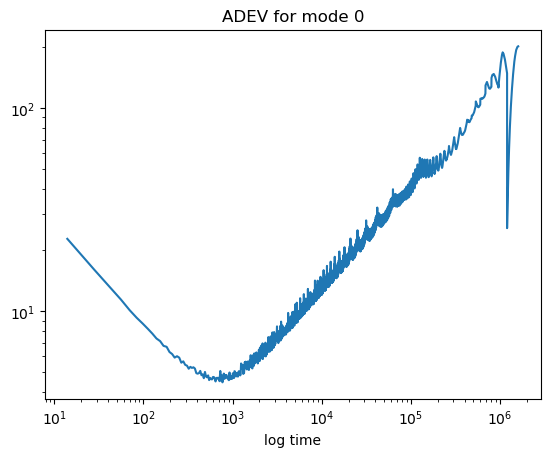

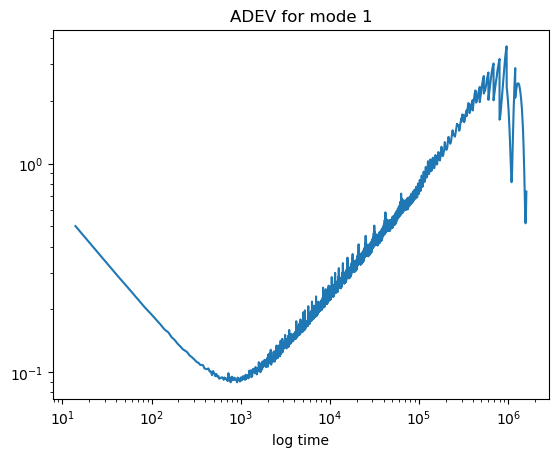

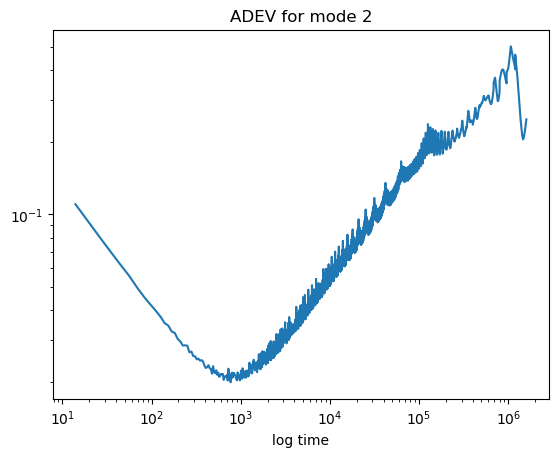

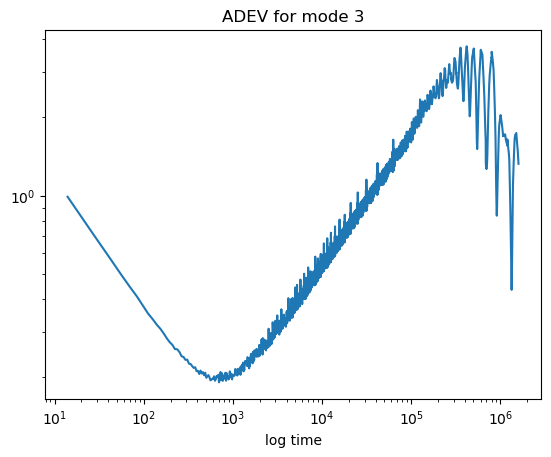

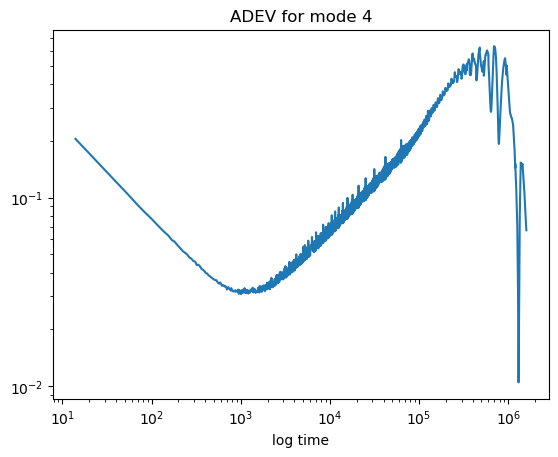

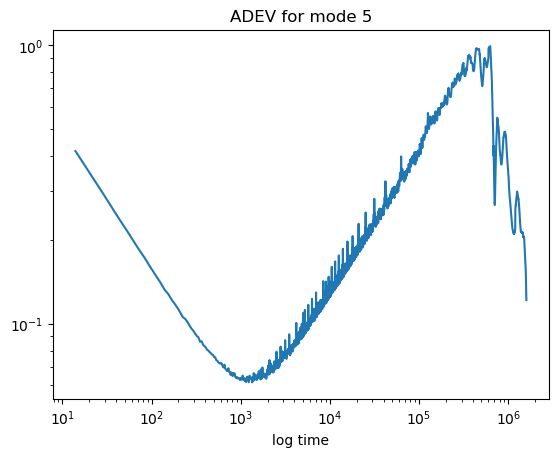

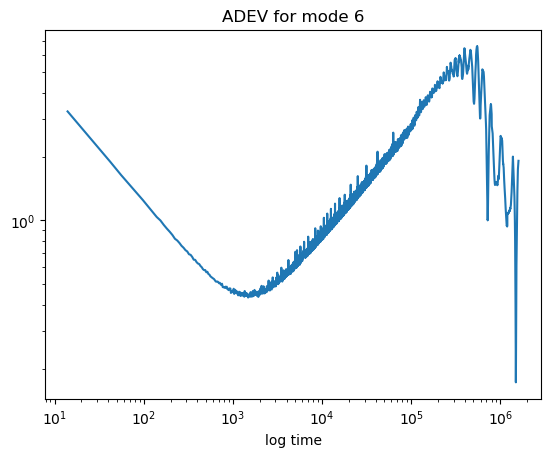

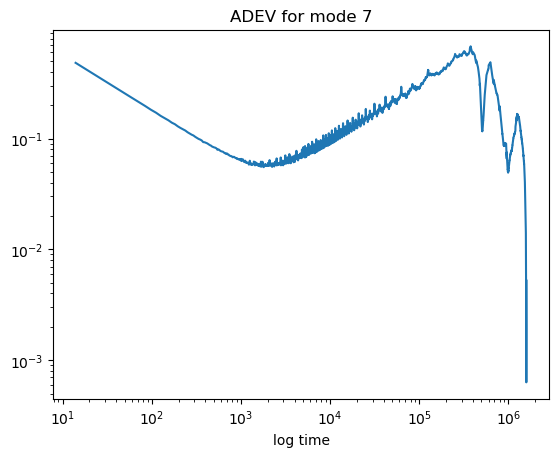

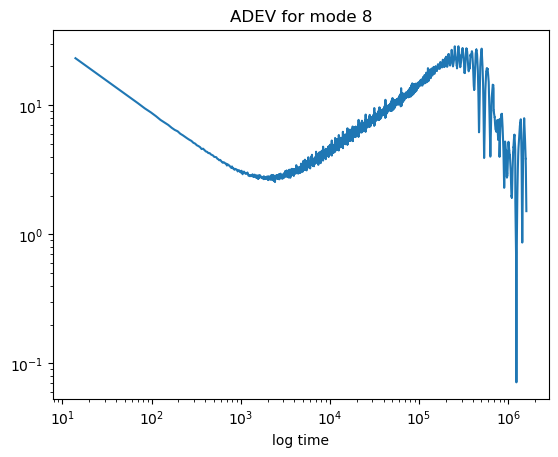

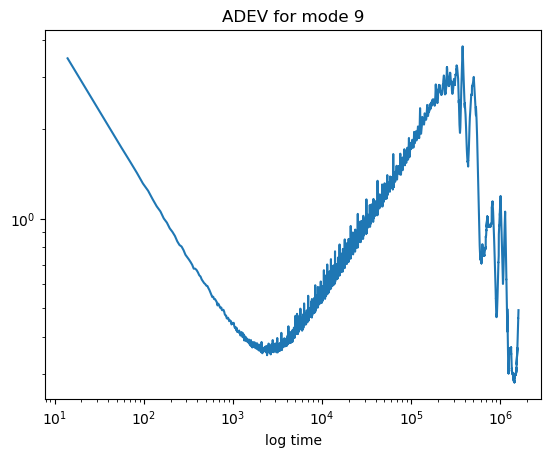

<Figure size 640x480 with 0 Axes>

In [44]:
# perform Adev computation mode by mode on loadings from pca perfromed on data with top 3 modes subtracted

for j in range(n_comps):
    ### amplitude
    yd = loadings_bb[j]/loadings_bb[j][0]  
    #plt.plot(yd);    
    #plt.title('normalized loading for mode {}'.format(j)) #after subtracting top 3 modes
    #plt.show()
    t= np.logspace(0,10,100)
    r=1/14 # sample rate
    (t2, ad, ade, adn) = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    fig = plt.loglog(t2, ad)
    plt.title('ADEV for mode {}'.format(j))
    plt.xlabel('log time')
    plt.figure()

In [ ]:
'''
# =============================================================================
# GP w/.o scaling
# =============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel, DotProduct

kernel_ = RBF(length_scale = 1, length_scale_bounds = (1e-3, 100))  + WhiteKernel() + ConstantKernel(constant_value = 1, constant_value_bounds = (1e-3, 1e6))
gp_model = GaussianProcessRegressor(kernel=kernel_)

# fit model
gp_model.fit(loadings_train[:, :], y_train)  # Fit the GP on the current batch
'''

In [34]:
#y_pred_train, std_pred_train = gp_model.predict(loadings_train , return_std=True)

In [35]:
#df_gp_train = pd.DataFrame({'y_pred_train':y_pred_train, 'std_pred_train':std_pred_train})
#df_gp_train.to_csv('../saved_data/gp_training_output')

In [36]:
#plt.plot(std_pred_train, y_train.to_numpy())

In [37]:
#X_reduced_test = pca.transform(X_test)

In [38]:
#y_pred_test, std_pred_test = gp_model.predict(X_reduced_test , return_std=True)

In [39]:
#df_gp_train = pd.DataFrame({'y_pred_test':y_pred_test, 'std_pred_test':std_pred_test,})
#df_gp_train.to_csv('../saved_data/gp_testing_output')

In [40]:
#plt.plot(y_pred_test, y_test,'x')

In [ ]:
#plt.plot((y_test - y_pred)/std_pred, 'x')
plt.plot(y_test/30, 'ro')

In [42]:
#X_reduced_all = pca.transform(X)
#y_pred_all, std_pred_all = gp_model.predict(X_reduced_all , return_std=True)
#df_gp_train = pd.DataFrame({'y_pred_all':y_pred_all, 'std_pred_all':std_pred_all,})
#df_gp_train.to_csv('../saved_data/gp_all_output')